In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Activity 1- Data Loading and Exploration


In [2]:
#Task 1: Load the OKCupid dataset.
data = pd.read_csv("profiles.csv")

In [3]:
data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
data.shape

(59946, 31)

In [6]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
data.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

In [8]:
data.index

RangeIndex(start=0, stop=59946, step=1)

In [9]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

## Age Distribution

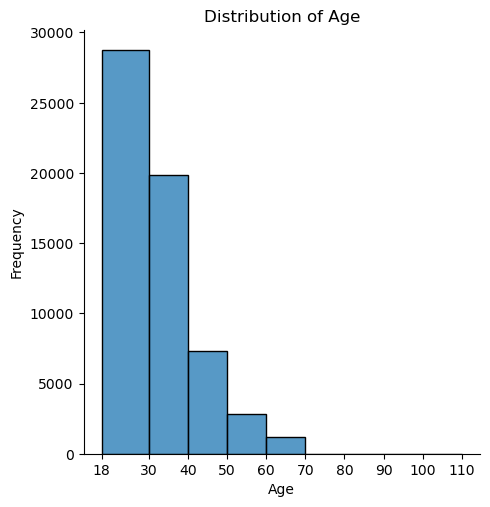

In [10]:
sns.displot(data=data,x="age",bins=[18,30,40,50,60,70,80,90,100,110])
plt.xticks([18,30,40,50,60,70,80,90,100,110])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This means mostly people between 18-40 are using OkCupid. It's rare seeing a user over 50.

## Age Distribution based on gender

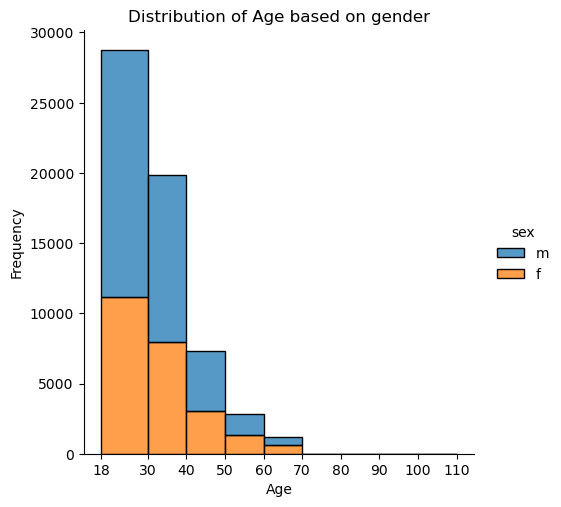

In [11]:
sns.displot(data=data,x="age",bins=[18,30,40,50,60,70,80,90,100,110],hue="sex",multiple="stack")
plt.xticks([18,30,40,50,60,70,80,90,100,110])
plt.title('Distribution of Age based on gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

According to the histogram, the distribution for both genders are the same, but there are more male users than female users between 18 to 40

## Height Distribution

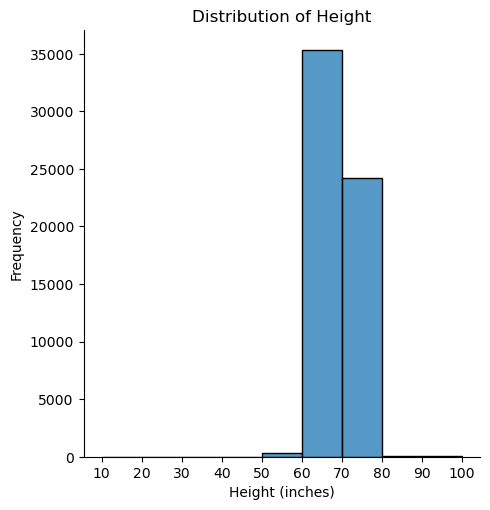

In [12]:
sns.displot(data=data,x="height",bins=[10,20,30,40,50,60,70,80,90,100])
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

The heights of users has a normal distribution.Heights of most of the users are between 60 and 80

## Height Distribution based on gender

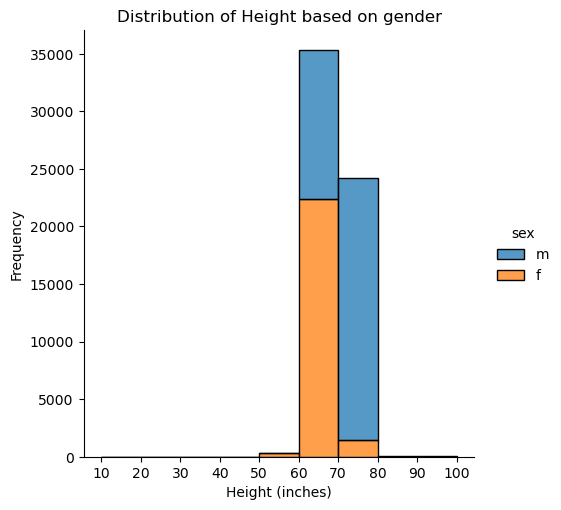

In [13]:
sns.displot(data=data,x="height",bins=[10,20,30,40,50,60,70,80,90,100],hue="sex",multiple="stack")
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of Height based on gender')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

The heights of users has a normal distribution.Heights of most of the users are between 60 and 80.Males are taller than females.

## Income Distribution

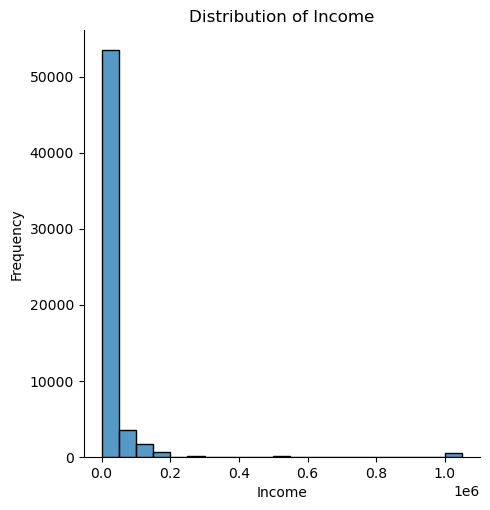

In [14]:
sns.displot(data=data,x="income",binwidth = 50000)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Most of users have an income under 200000.

## Income Distribution based on gender

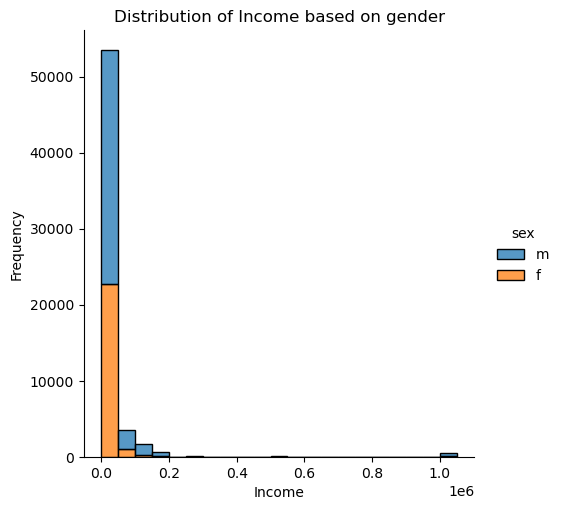

In [15]:
sns.displot(data=data,x="income",binwidth = 50000,hue="sex",multiple="stack")
plt.title('Distribution of Income based on gender')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Male users have higher income than females

## Gender

In [16]:
data.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

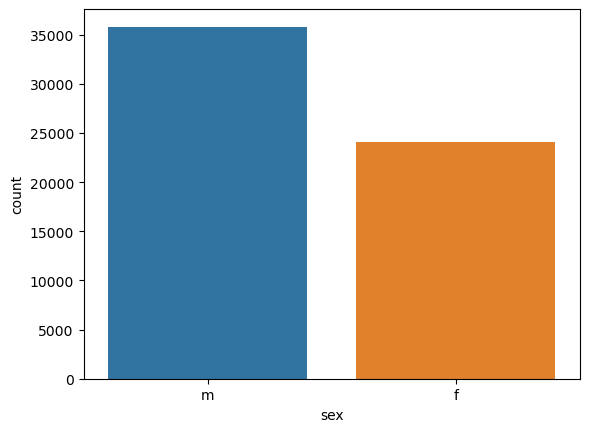

In [17]:
sns.countplot(data=data,x="sex")
plt.show()

Male users are more than female users.

## Body Type

In [18]:
data.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

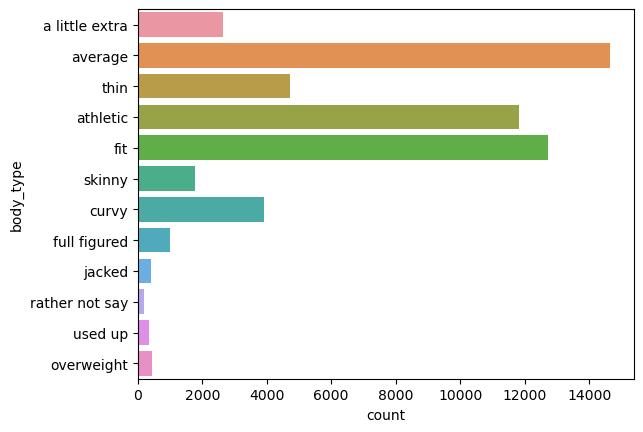

In [19]:
sns.countplot(data=data,y="body_type")
plt.show()

Most of the users declared their body type as average, fit, or athletic.

## Body Type based on gender

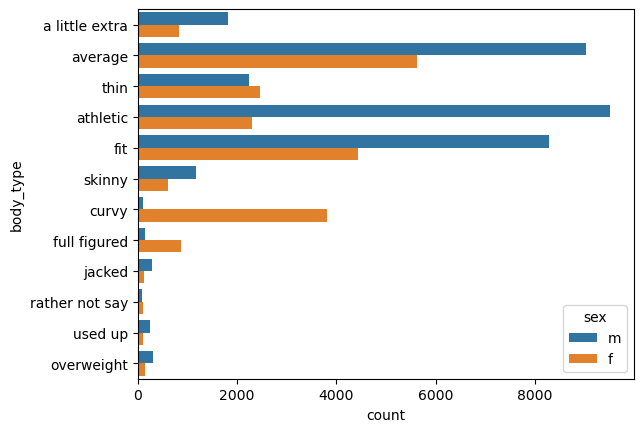

In [20]:
sns.countplot(data=data,y="body_type",hue="sex")
plt.show()

When we split countplot of body type variable by gender, we can see that most of the females described their body types with following three categories: average, fit or curvy but males described their body types with athletic, average or fit.It seems that curvy and full figured are feminine descriptions and overweight and jacked used mostly by male users.

## Diet

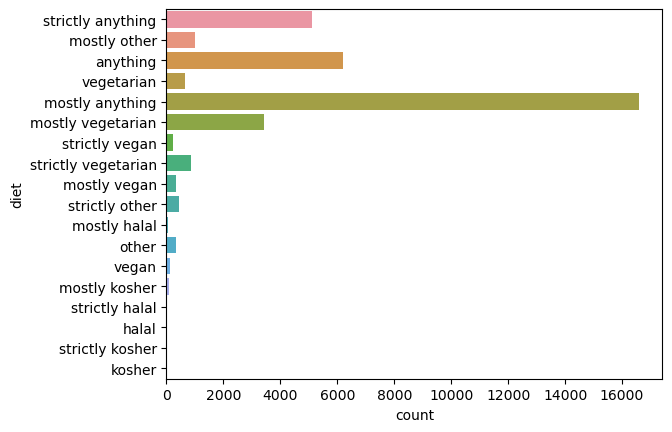

In [21]:
sns.countplot(data=data,y="diet")
plt.show()

According to the countplot above, most of the users eat mostly anything, followed by 'anything', 'strongly anything'.The fourth popular diet is 'mostly vegeterian'.

## Diet based on gender

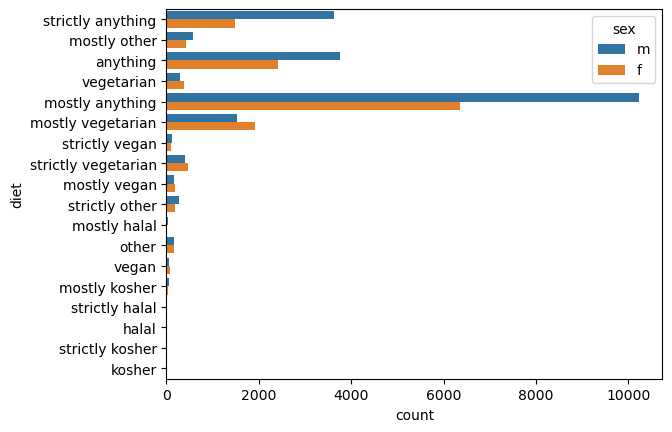

In [22]:
sns.countplot(data=data,y="diet",hue="sex")
plt.show()

When we split the diet data with gender, women are more likely to be vegetarian.

## Drinks

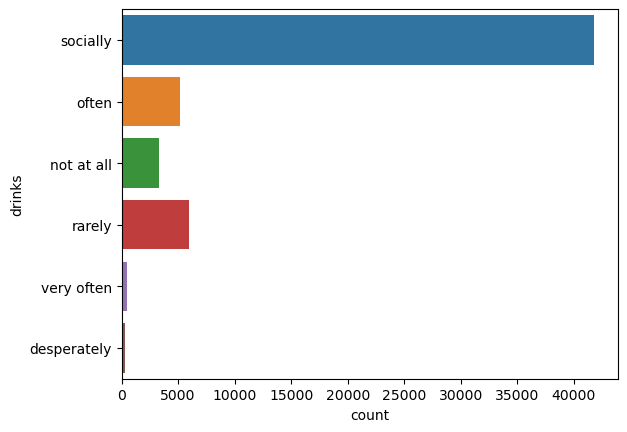

In [23]:
sns.countplot(data=data,y="drinks")
plt.show()

The majority of the users drink "socially".

## Drinks based on gender

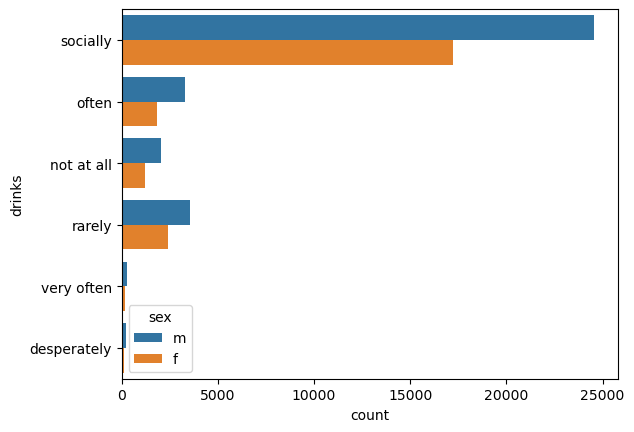

In [24]:
sns.countplot(data=data,y="drinks",hue="sex")
plt.show()

The majority of the users drink "socially" by males than females

## Drugs

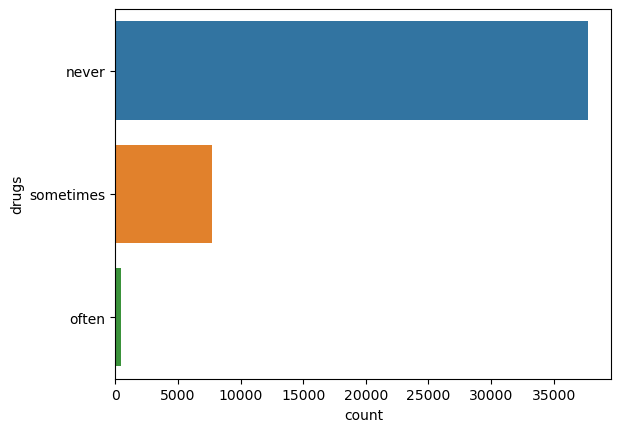

In [25]:
sns.countplot(data=data,y="drugs")
plt.show()

we can see that overwhelming majority of the users never use drugs.

## Drugs based on gender

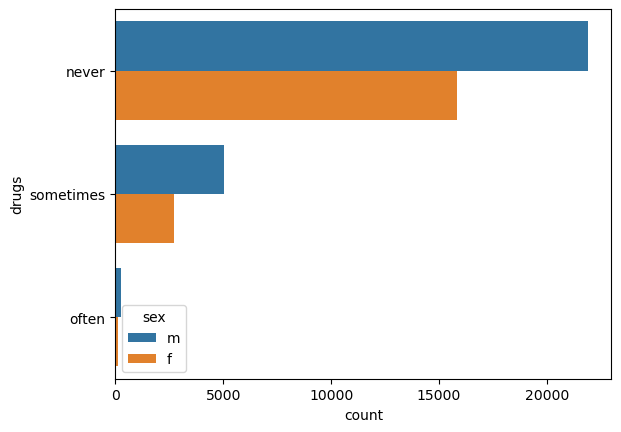

In [26]:
sns.countplot(data=data,y="drugs",hue="sex")
plt.show()

## Education

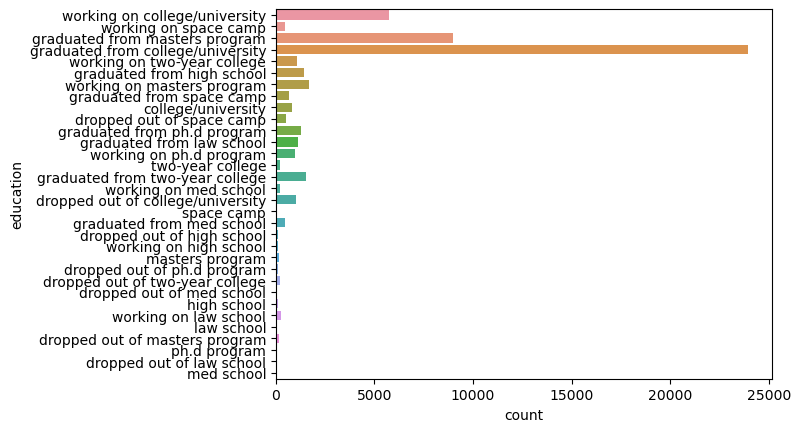

In [27]:
sns.countplot(data=data,y="education")
plt.show()

According to the chart Above, we can see that the majority of users graduated from college/university followed by masters graduates and people who 'working on college/university'.

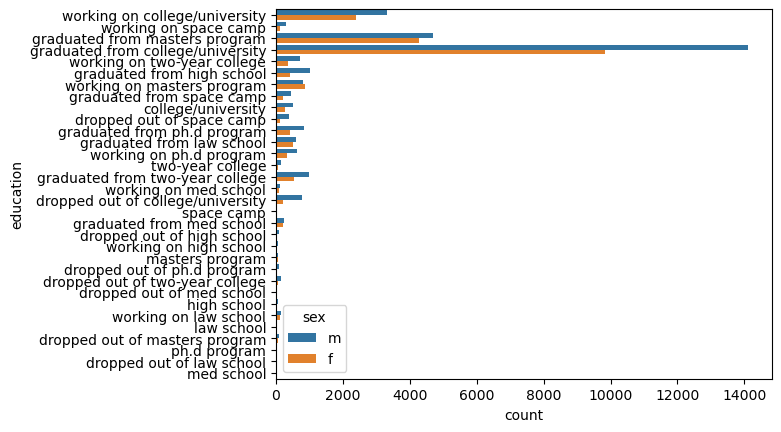

In [28]:
sns.countplot(data=data,y="education",hue="sex")
plt.show()

## Status

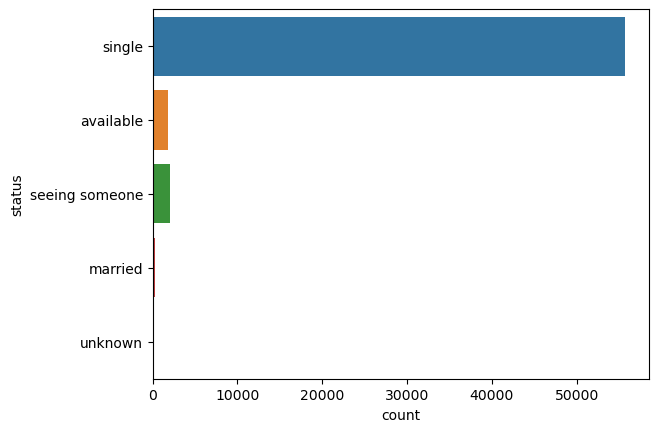

In [29]:
sns.countplot(data=data,y="status")
plt.show()

The vast majority of uses are single.This is reasonable.Because they registered in this dating app to find a partner.

## Status based on gender

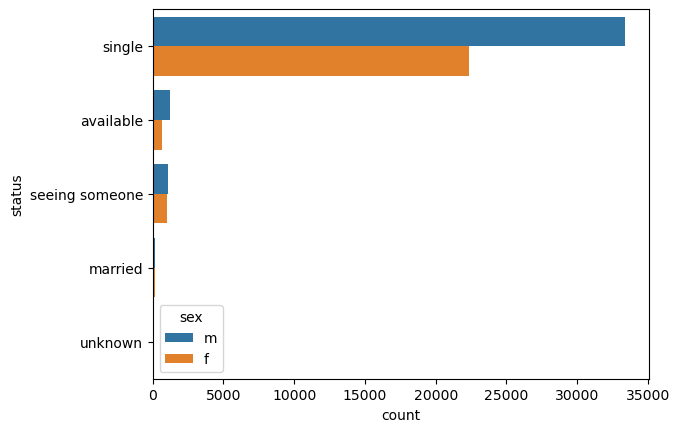

In [30]:
sns.countplot(data=data,y="status",hue="sex")
plt.show()

## Orientation

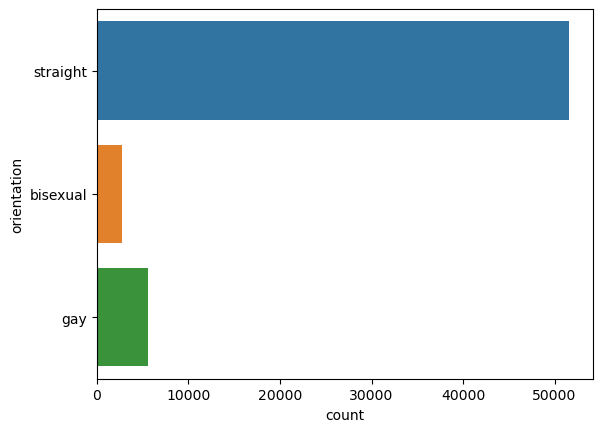

In [31]:
sns.countplot(data=data,y="orientation")
plt.show()

According to the chart Above, as far as sexual orientation is concerned, the majority of the users are straight.

## Orientation based on gender

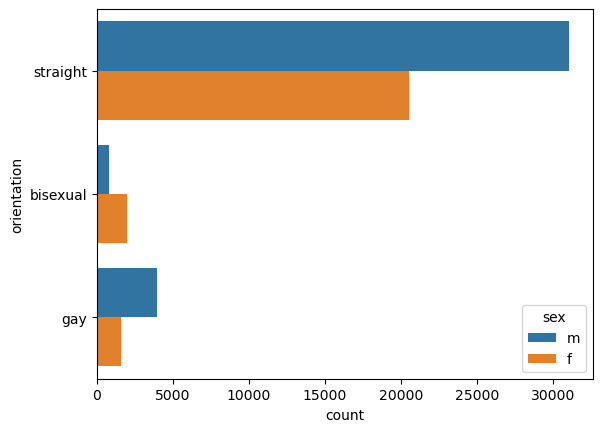

In [32]:
sns.countplot(data=data,y="orientation",hue="sex")
plt.show()

## Job

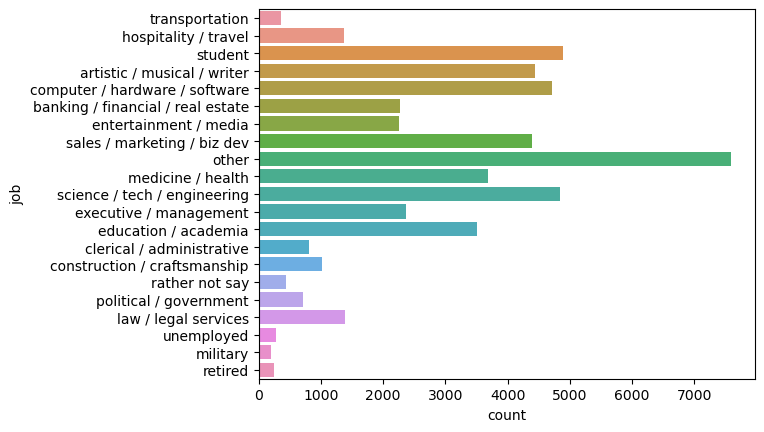

In [33]:
sns.countplot(data=data,y="job")
plt.show()

Students, technicians, computer specialists, artists and those who works in business make up the majority of OKCupid users with roughly the equal percentage of users.

## location

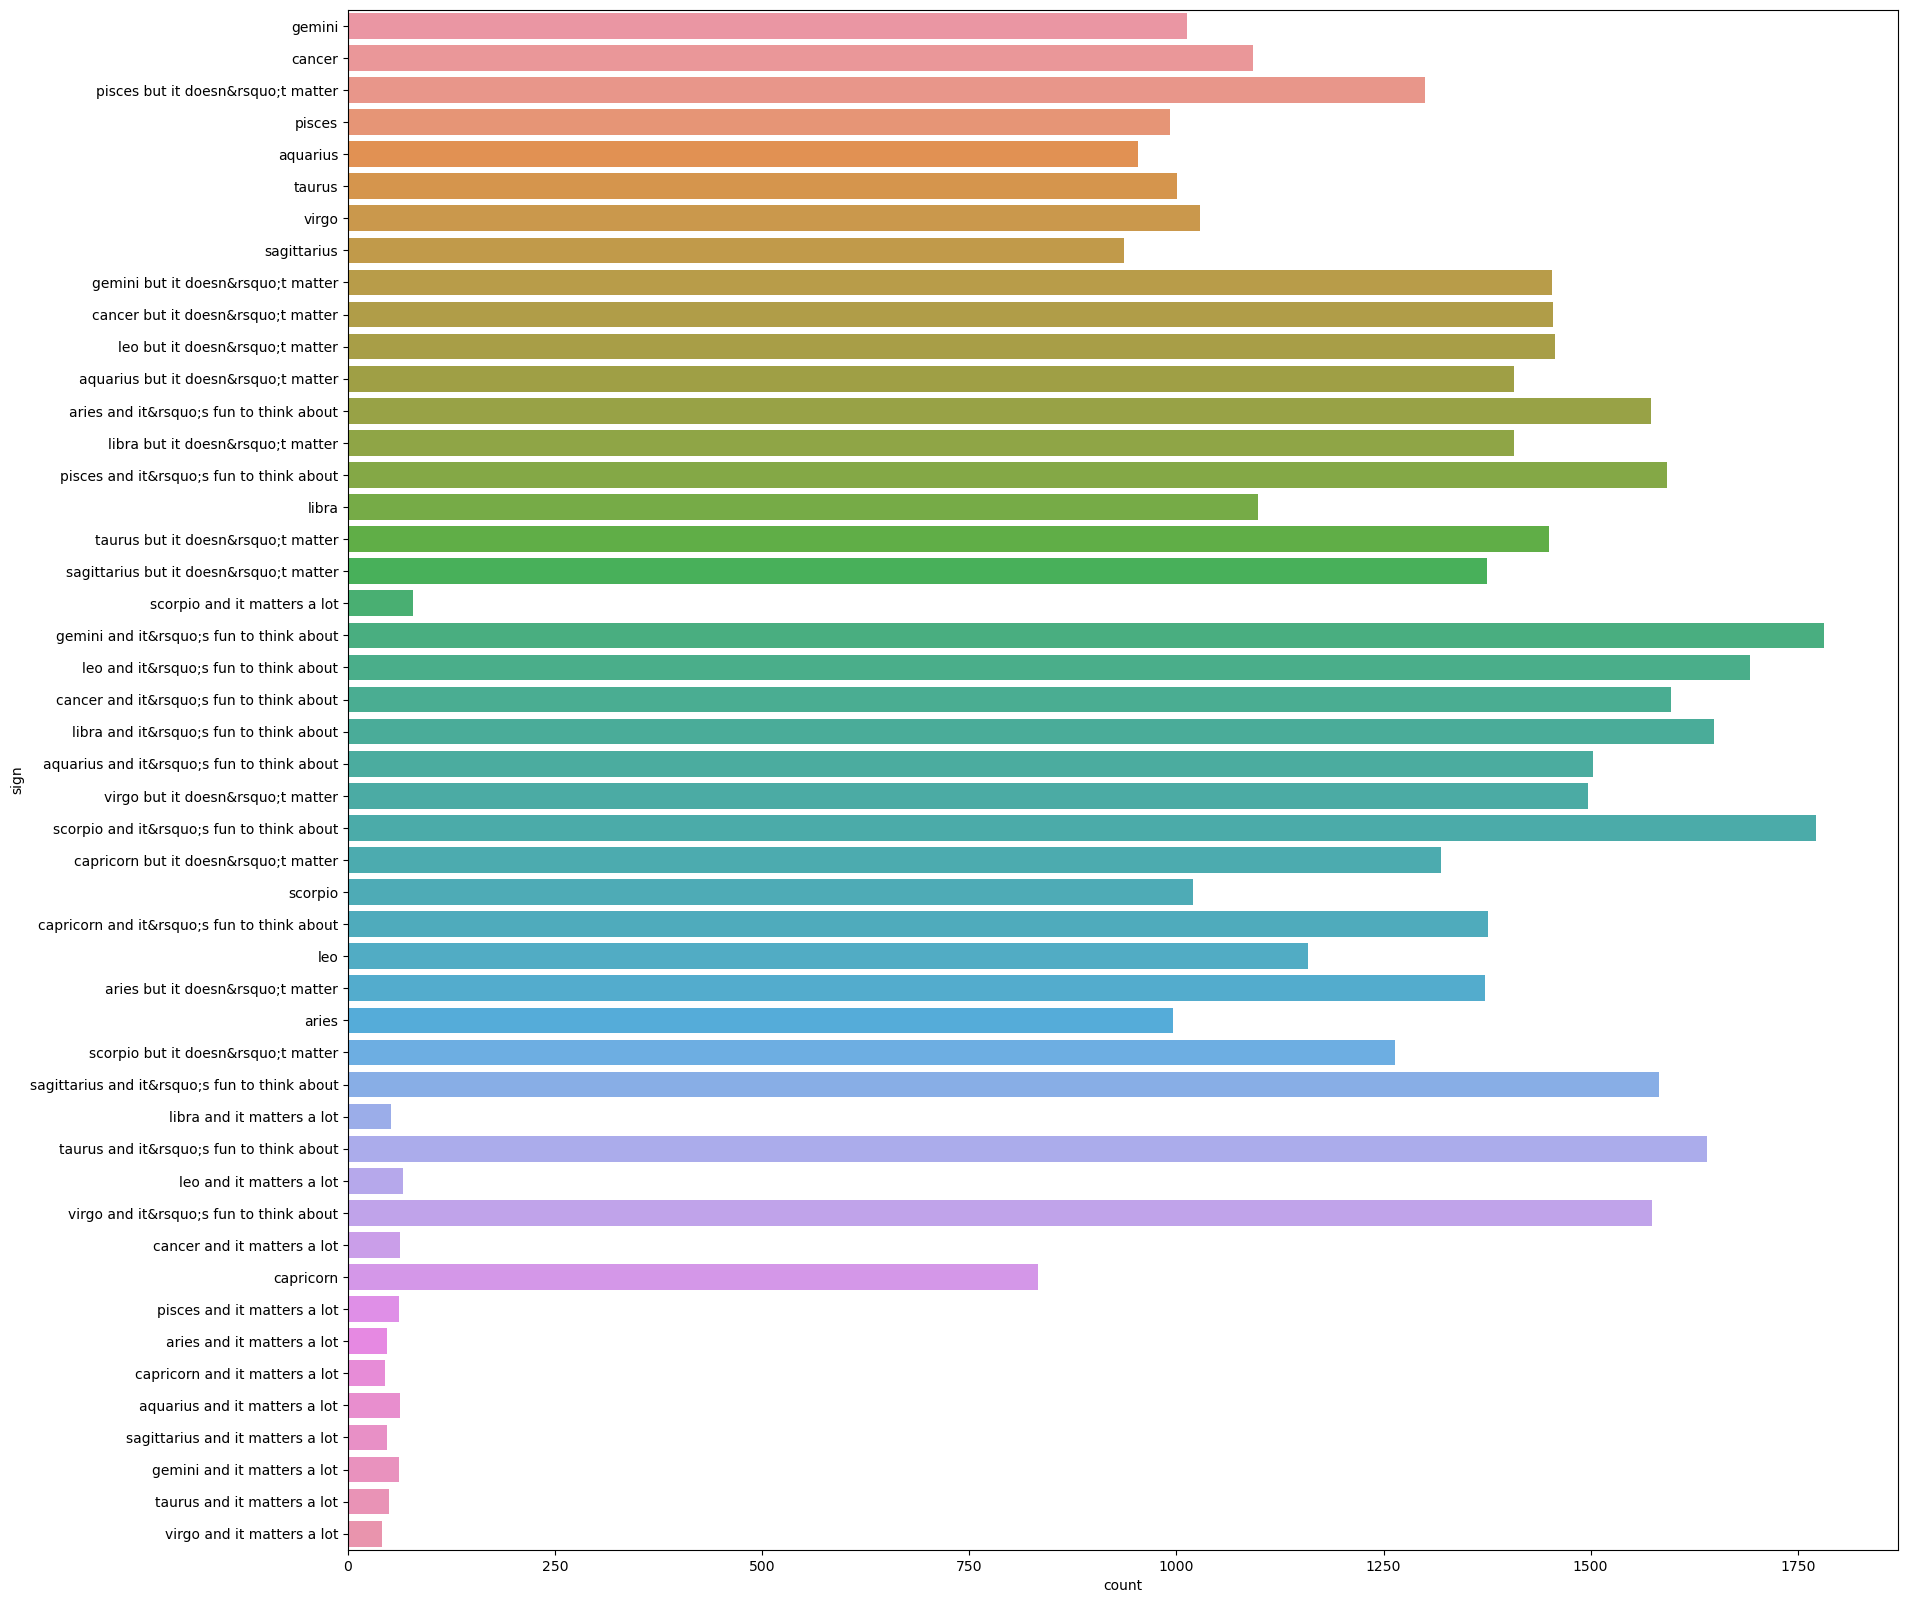

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(data=data,y="sign")
plt.show()

In [35]:
data['location_cleaned']=data.sign.str.split().str[0]

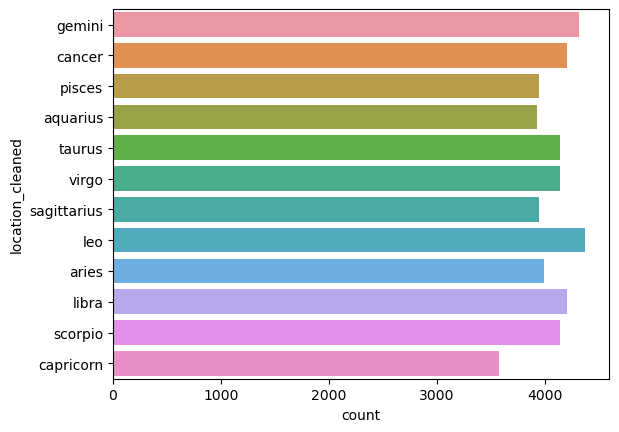

In [36]:
sns.countplot(data=data,y="location_cleaned")
plt.show()

## Offspring

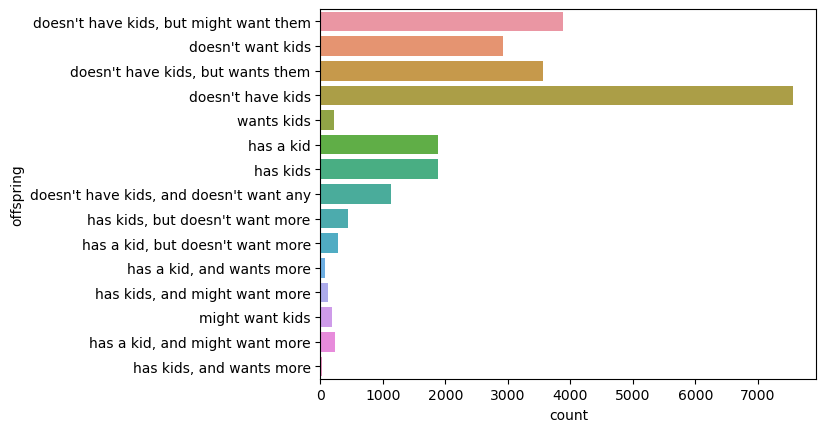

In [37]:
sns.countplot(data=data, y="offspring")
plt.show()

The data suggest that most users do not have kids.

## Pets 

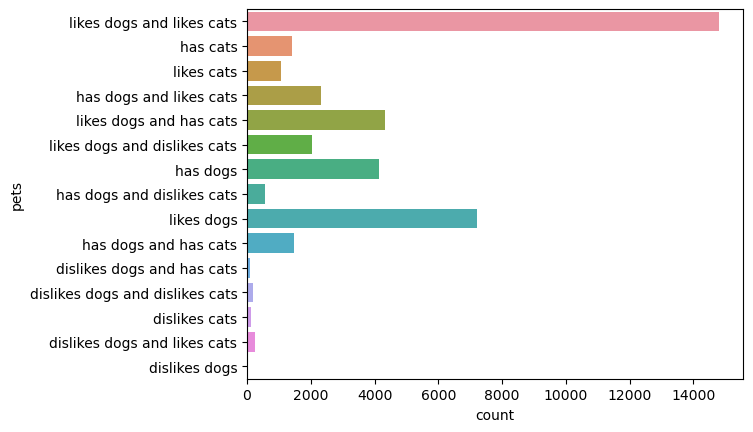

In [38]:
sns.countplot(data=data, y="pets")
plt.show()

Most users like both dogs and cats.

## Religion

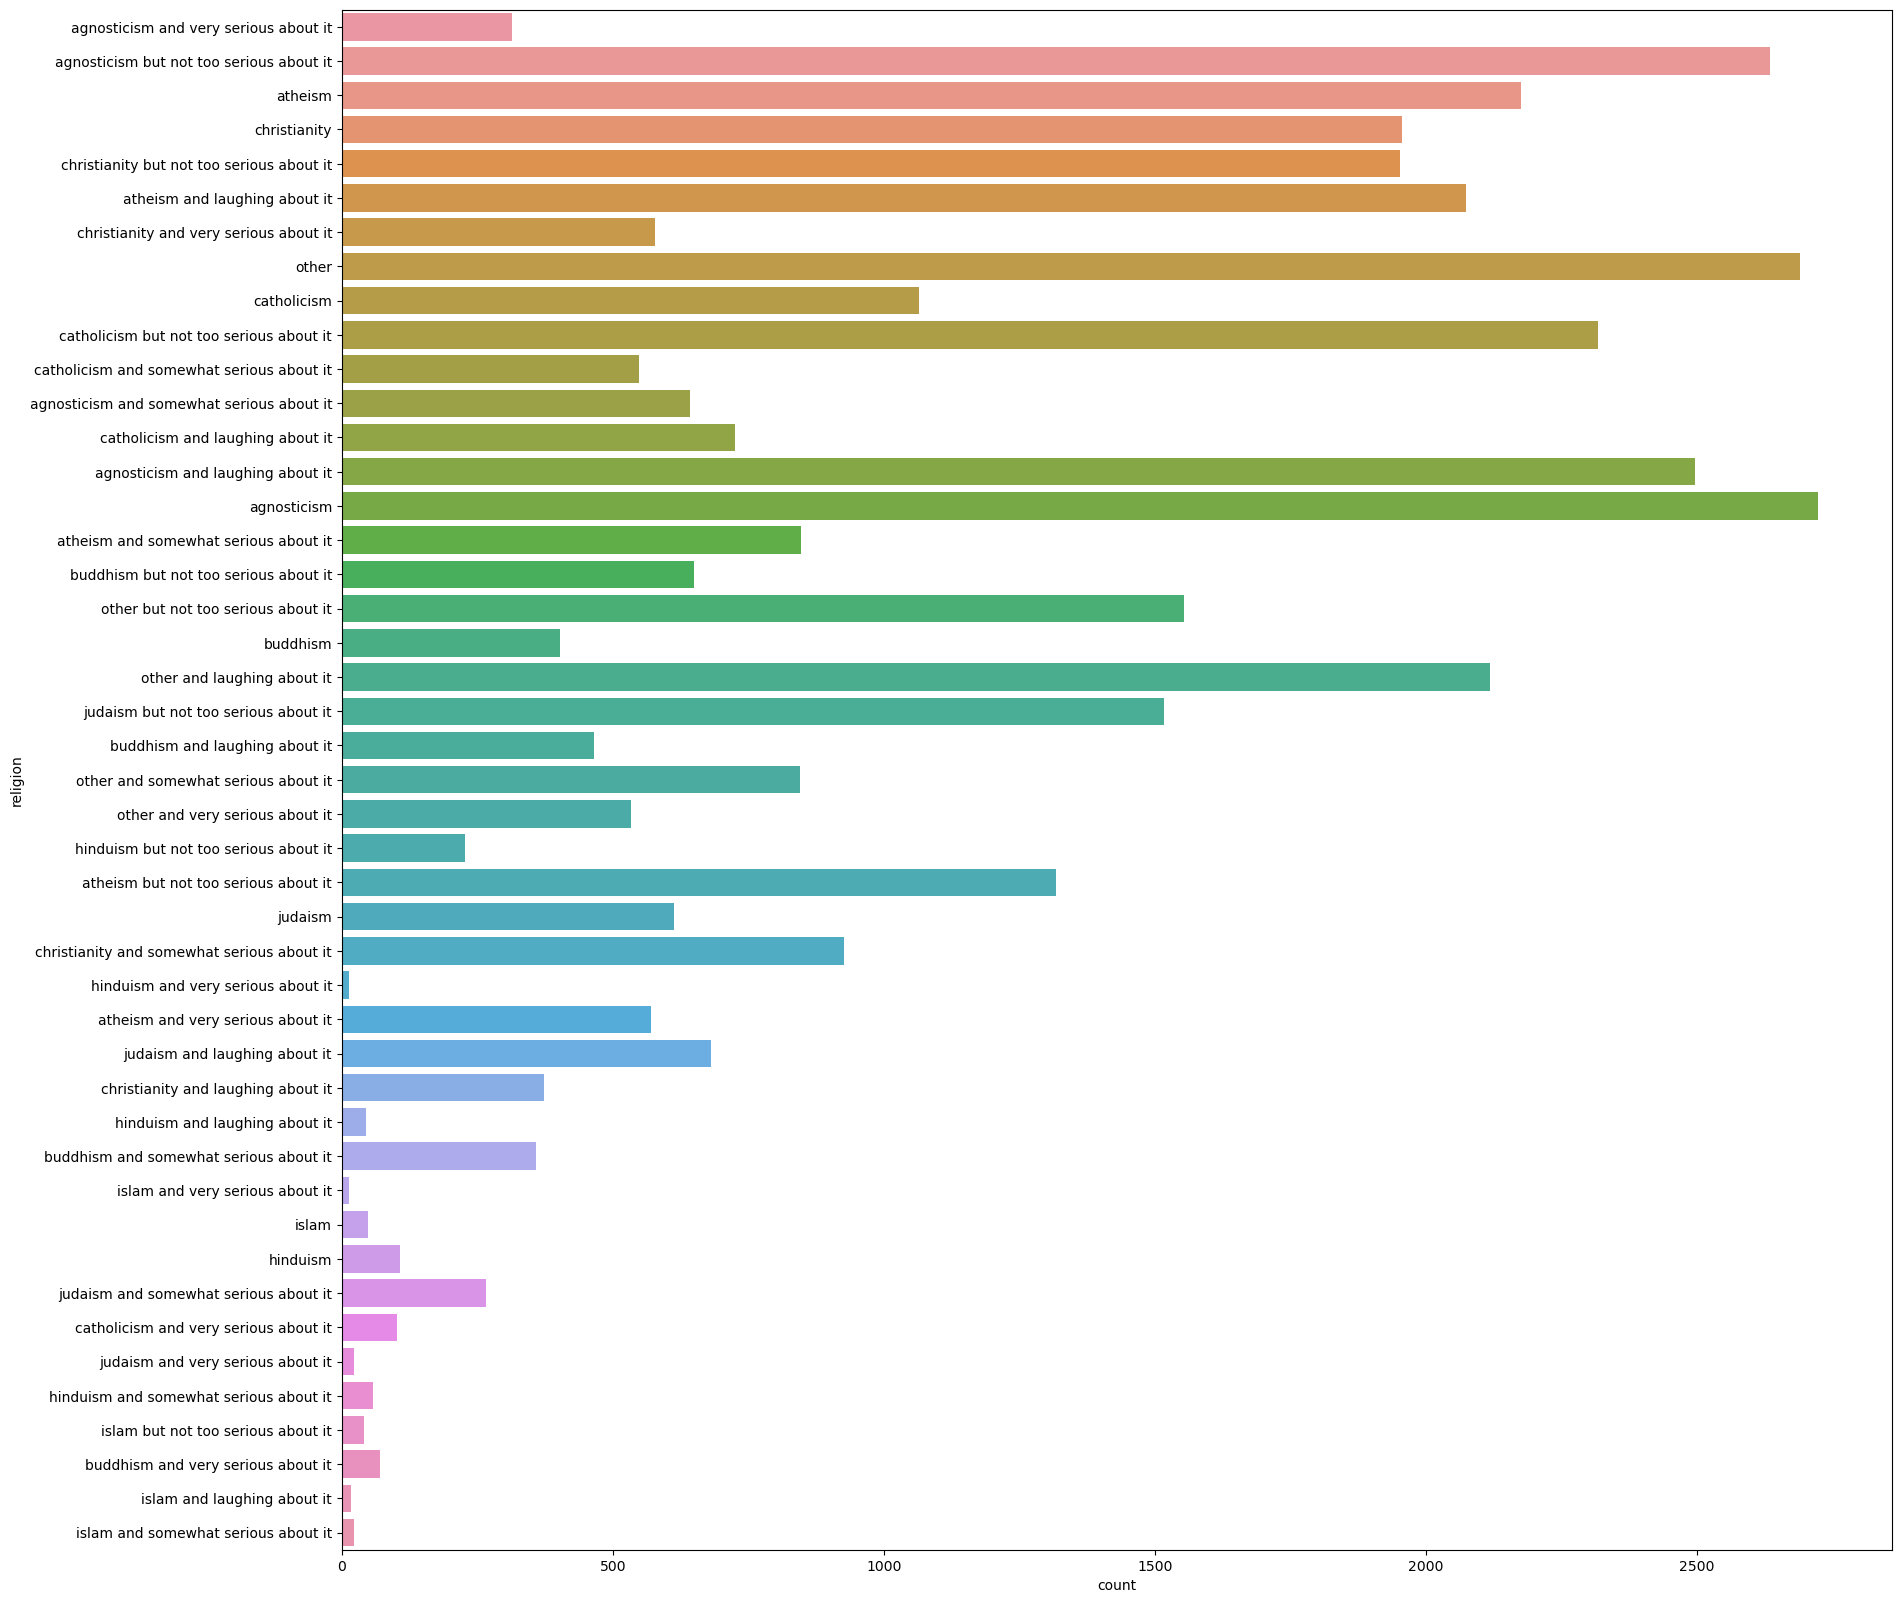

In [39]:
plt.figure(figsize=(20,20))
sns.countplot(data=data,y="religion")
plt.show()

In [40]:
data['religion_cleaned']=data.sign.str.split().str[0]

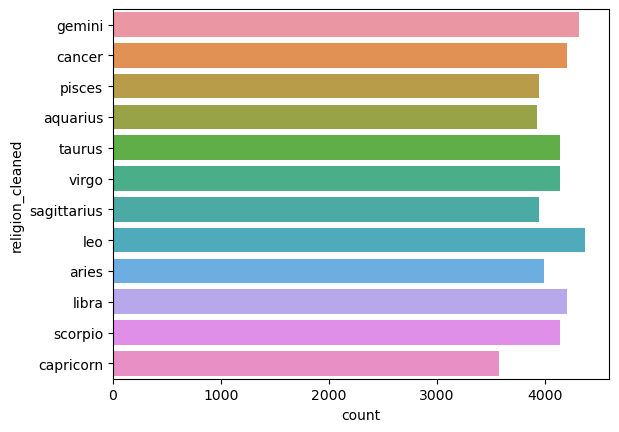

In [41]:
sns.countplot(data=data,y="religion_cleaned")
plt.show()

The plot shows that most of the users are not religious.The majority of OKCupid's users are agnostic or atheist or did not mention their belief(other).Between religious users, most of them are christian.

## Sign

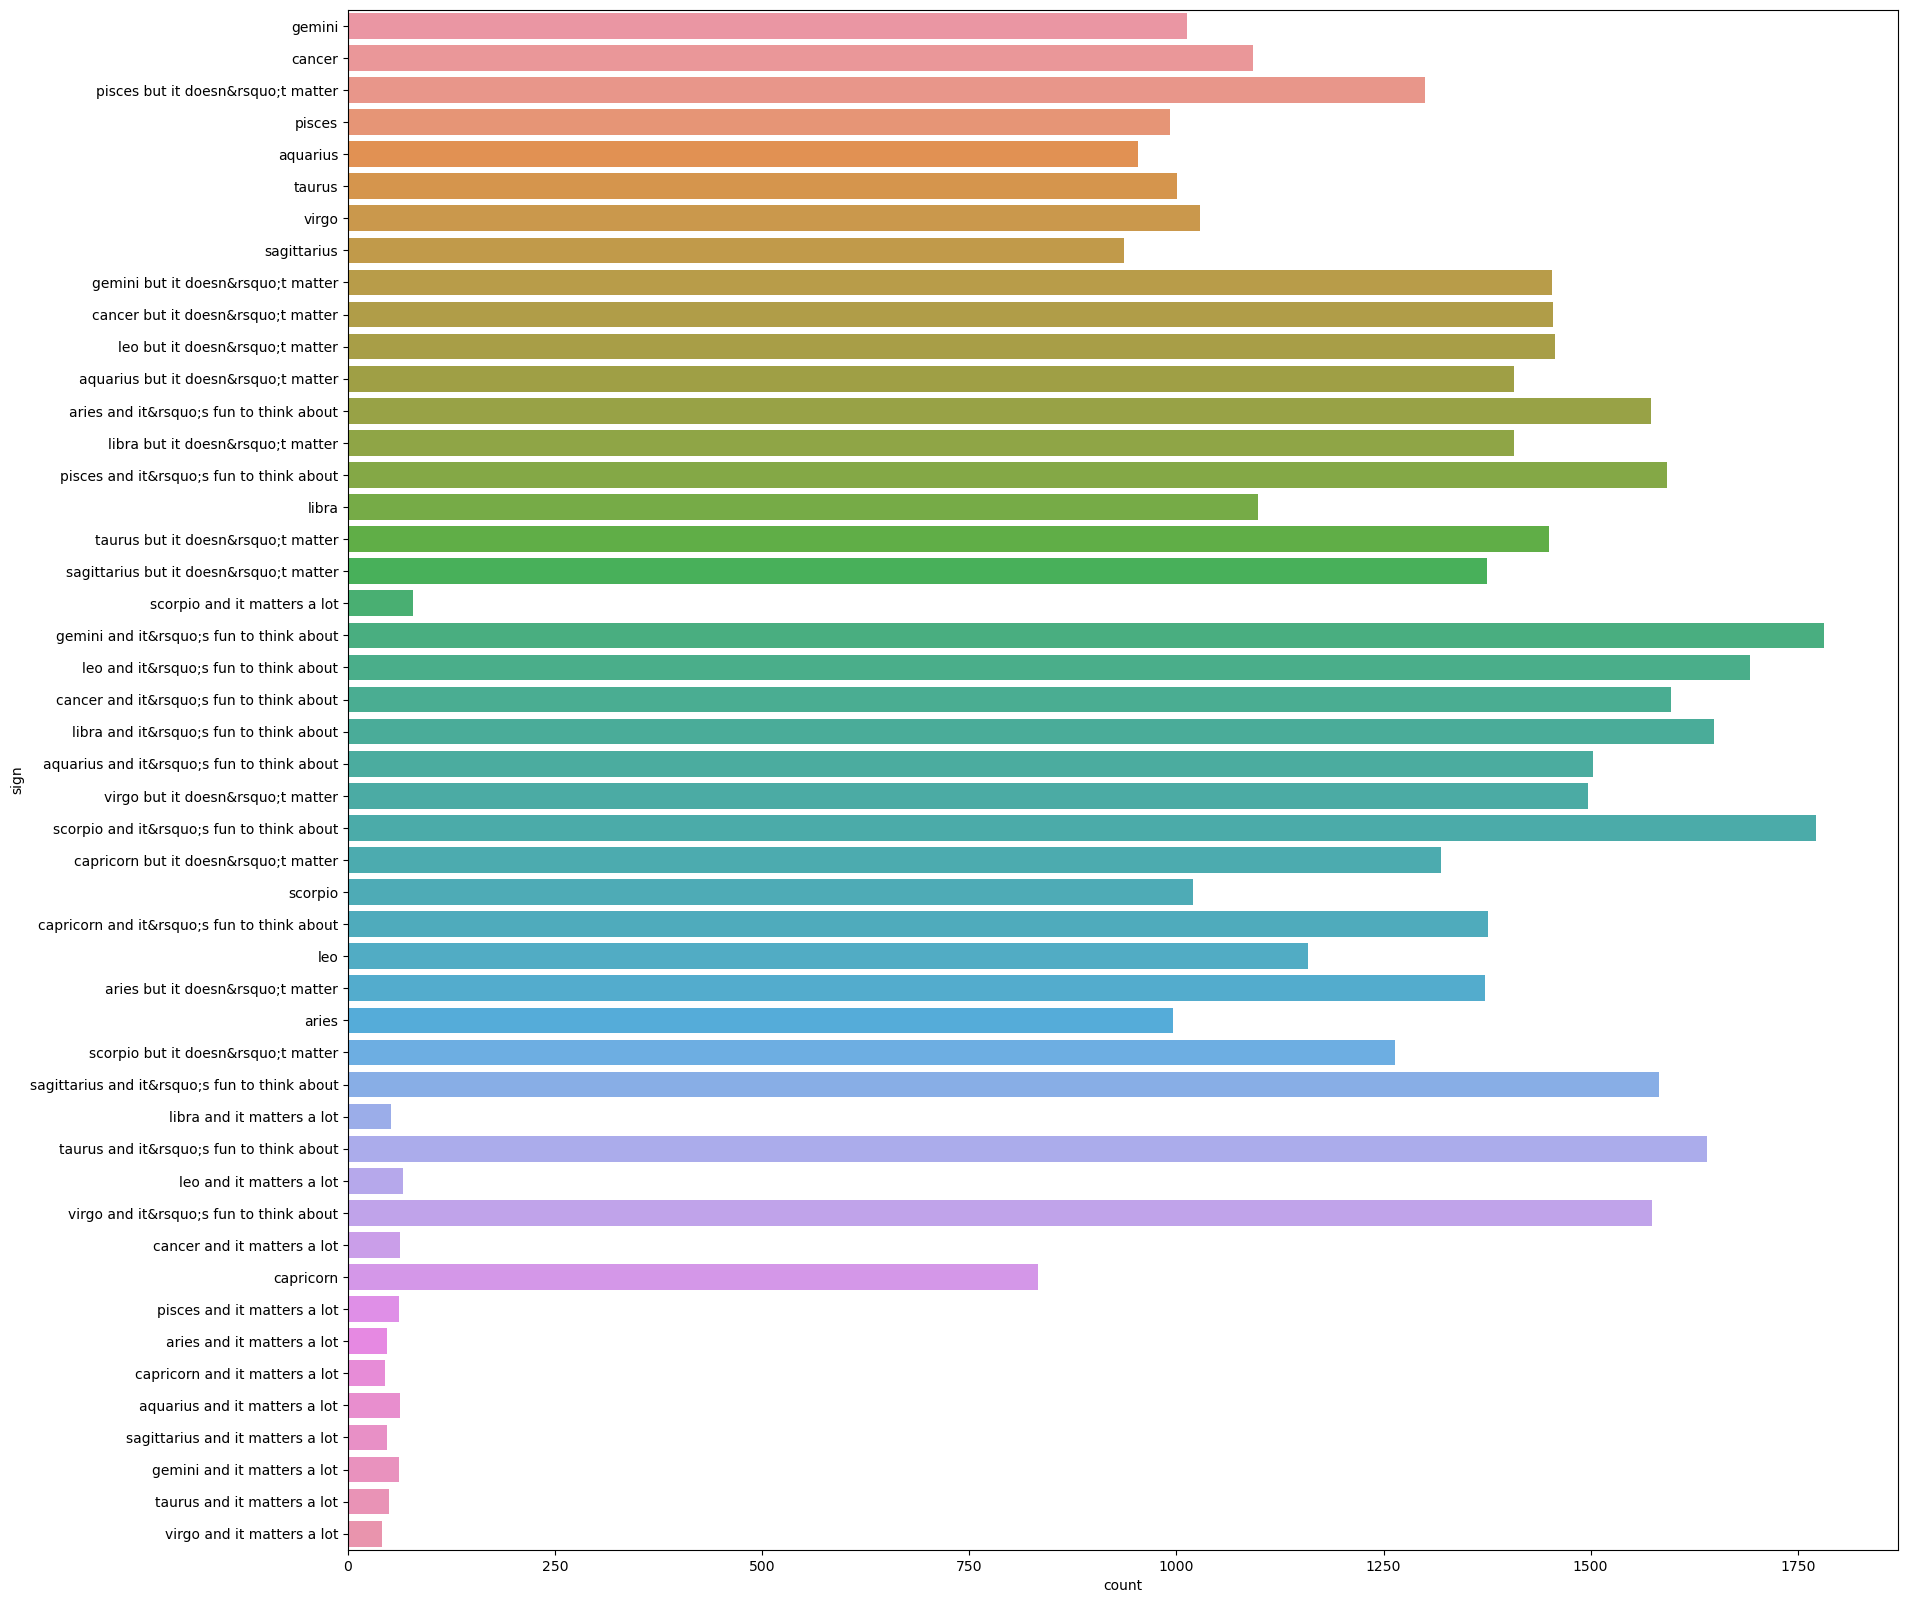

In [42]:
plt.figure(figsize=(20,20))
sns.countplot(data=data,y="sign")
plt.show()

In [43]:
data['Sign_cleaned']=data.sign.str.split().str[0]

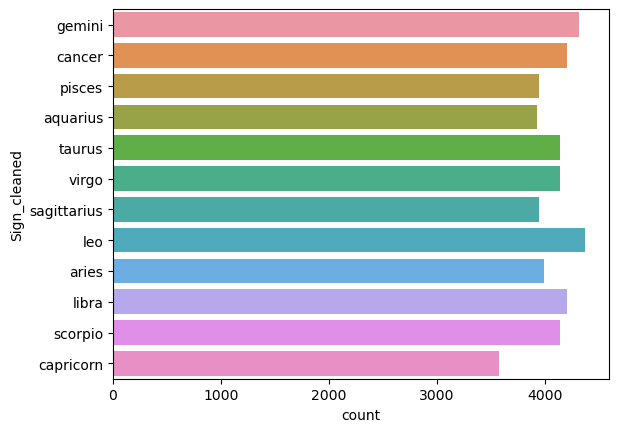

In [44]:
sns.countplot(data=data,y="Sign_cleaned")
plt.show()

Astrological sign of the most of users is Leo and least common astrological sign of the users is Capricorn.

## Smokes

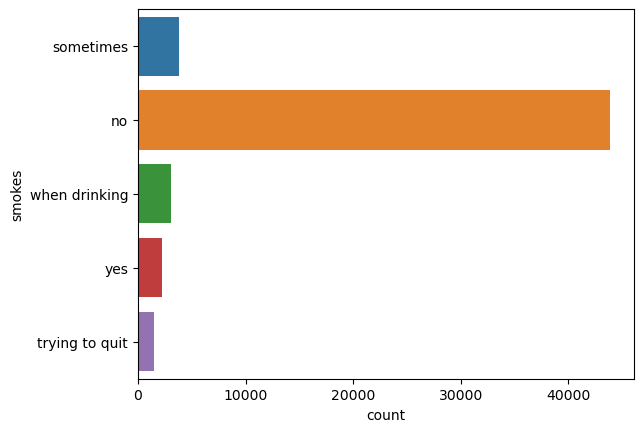

In [45]:
sns.countplot(data=data, y="smokes")
plt.show()

# Activity 2 - Data Cleaning and Preparation


In [46]:
data.isnull().sum()

age                     0
status                  0
sex                     0
orientation             0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
pets                19921
religion            20226
sign                11056
smokes               5512
speaks                 50
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
location_cleaned    11056
religion_cleaned    11056
Sign_cleaned        11056
dtype: int64

In [47]:
body_type_code={'thin':0,'skinny':1,'fit':2,'athletic':3,'jacked':4,'rather not say':5,'average':6,'a little extra':7,'used up':8,'curvy':9,'full figured':10}
drinks_code={'not at all':0,'rarely':1,'socially':2,'often':3,'very often':4,'desperately':5}
drugs_code={'never':0,'sometimes':1,'often':2}
smokes_code={'no':0,'when drinking':1,'sometimes':2,'trying to quit':3,'yes':4}

In [48]:
data['body_type_codes']=data.body_type.map(body_type_code)
data['drinks_codes']=data.drinks.map(drinks_code)
data['drugs_codes']=data.drugs.map(drugs_code)
data['smokes_codes']=data.smokes.map(smokes_code)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               59946 non-null  int64  
 1   status            59946 non-null  object 
 2   sex               59946 non-null  object 
 3   orientation       59946 non-null  object 
 4   body_type         54650 non-null  object 
 5   diet              35551 non-null  object 
 6   drinks            56961 non-null  object 
 7   drugs             45866 non-null  object 
 8   education         53318 non-null  object 
 9   ethnicity         54266 non-null  object 
 10  height            59943 non-null  float64
 11  income            59946 non-null  int64  
 12  job               51748 non-null  object 
 13  last_online       59946 non-null  object 
 14  location          59946 non-null  object 
 15  offspring         24385 non-null  object 
 16  pets              40025 non-null  object

In [50]:
data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay7,essay8,essay9,location_cleaned,religion_cleaned,Sign_cleaned,body_type_codes,drinks_codes,drugs_codes,smokes_codes
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,gemini,gemini,gemini,7.0,2.0,0.0,2.0
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,i am very open and will share just about anyth...,NaN,cancer,cancer,cancer,6.0,3.0,1.0,0.0
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",pisces,pisces,pisces,0.0,2.0,NaN,0.0
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,NaN,NaN,you feel so inclined.,pisces,pisces,pisces,0.0,2.0,NaN,0.0
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,NaN,NaN,NaN,aquarius,aquarius,aquarius,3.0,2.0,0.0,0.0


## Activity 3 - Zodiac Sign Prediction

In [51]:
df_copy=data[['sign','body_type_codes','drinks_codes','drugs_codes','smokes_codes','orientation','diet','religion','sex','job',]]

In [52]:
df_copy.head()

,sign,body_type_codes,drinks_codes,drugs_codes,smokes_codes,orientation,diet,religion,sex,job
0,gemini,7.0,2.0,0.0,2.0,straight,strictly anything,agnosticism and very serious about it,m,transportation
1,cancer,6.0,3.0,1.0,0.0,straight,mostly other,agnosticism but not too serious about it,m,hospitality / travel
2,pisces but it doesn&rsquo;t matter,0.0,2.0,NaN,0.0,straight,anything,NaN,m,NaN
3,pisces,0.0,2.0,NaN,0.0,straight,vegetarian,NaN,m,student
4,aquarius,3.0,2.0,0.0,0.0,straight,NaN,NaN,m,artistic / musical / writer


In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sign             48890 non-null  object 
 1   body_type_codes  54206 non-null  float64
 2   drinks_codes     56961 non-null  float64
 3   drugs_codes      45866 non-null  float64
 4   smokes_codes     54434 non-null  float64
 5   orientation      59946 non-null  object 
 6   diet             35551 non-null  object 
 7   religion         39720 non-null  object 
 8   sex              59946 non-null  object 
 9   job              51748 non-null  object 
dtypes: float64(4), object(6)
memory usage: 4.6+ MB


In [54]:
df_copy = df_copy.dropna().copy()

In [55]:
df_copy.isnull().sum()

sign               0
body_type_codes    0
drinks_codes       0
drugs_codes        0
smokes_codes       0
orientation        0
diet               0
religion           0
sex                0
job                0
dtype: int64

In [56]:
df_copy.shape

(15936, 10)

In [57]:
df_copy['sign_cleaned']=df_copy.sign.str.split().str[0]

In [58]:
df_copy.drop('sign',axis=1,inplace=True)

In [59]:
df_copy['religion_cleaned']=df_copy.religion.str.split().str[0]

In [60]:
df_copy.drop('religion',axis=1,inplace=True)

In [61]:
df_copy=pd.get_dummies(data=df_copy,columns=['orientation','diet','sex','job','religion_cleaned'],drop_first=True)

In [62]:
df_copy.head()

,body_type_codes,drinks_codes,drugs_codes,smokes_codes,sign_cleaned,orientation_gay,orientation_straight,diet_halal,diet_kosher,diet_mostly anything,...,job_transportation,job_unemployed,religion_cleaned_atheism,religion_cleaned_buddhism,religion_cleaned_catholicism,religion_cleaned_christianity,religion_cleaned_hinduism,religion_cleaned_islam,religion_cleaned_judaism,religion_cleaned_other
0,7.0,2.0,0.0,2.0,gemini,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6.0,3.0,1.0,0.0,cancer,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6.0,2.0,0.0,0.0,sagittarius,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,3.0,0.0,0.0,0.0,cancer,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
11,6.0,2.0,0.0,0.0,leo,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [63]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15936 entries, 0 to 59944
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   body_type_codes                        15936 non-null  float64
 1   drinks_codes                           15936 non-null  float64
 2   drugs_codes                            15936 non-null  float64
 3   smokes_codes                           15936 non-null  float64
 4   sign_cleaned                           15936 non-null  object 
 5   orientation_gay                        15936 non-null  uint8  
 6   orientation_straight                   15936 non-null  uint8  
 7   diet_halal                             15936 non-null  uint8  
 8   diet_kosher                            15936 non-null  uint8  
 9   diet_mostly anything                   15936 non-null  uint8  
 10  diet_mostly halal                      15936 non-null  uint8  
 11  di

In [64]:
y=df_copy['sign_cleaned']

In [65]:
X=df_copy.drop('sign_cleaned',axis=1)

In [66]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
scaler=MinMaxScaler()

In [68]:
X_train=scaler.fit_transform(X_train)

In [69]:
X_test=scaler.transform(X_test)

## Artificial Neural Network

In [70]:
mlp=MLPClassifier(max_iter=1000)

In [71]:
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=1000)

In [72]:
mlp.score(X_train,y_train)

0.2548635080012551

In [73]:
mlp_predict=mlp.predict(X_test)

In [74]:
print(classification_report(y_test,mlp_predict))

              precision    recall  f1-score   support

    aquarius       0.07      0.05      0.06       233
       aries       0.06      0.06      0.06       268
      cancer       0.08      0.06      0.07       281
   capricorn       0.06      0.05      0.05       233
      gemini       0.06      0.04      0.05       290
         leo       0.10      0.12      0.11       290
       libra       0.08      0.07      0.07       274
      pisces       0.11      0.13      0.12       267
 sagittarius       0.10      0.14      0.12       252
     scorpio       0.08      0.09      0.08       264
      taurus       0.07      0.05      0.06       263
       virgo       0.11      0.14      0.12       273

    accuracy                           0.09      3188
   macro avg       0.08      0.08      0.08      3188
weighted avg       0.08      0.09      0.08      3188



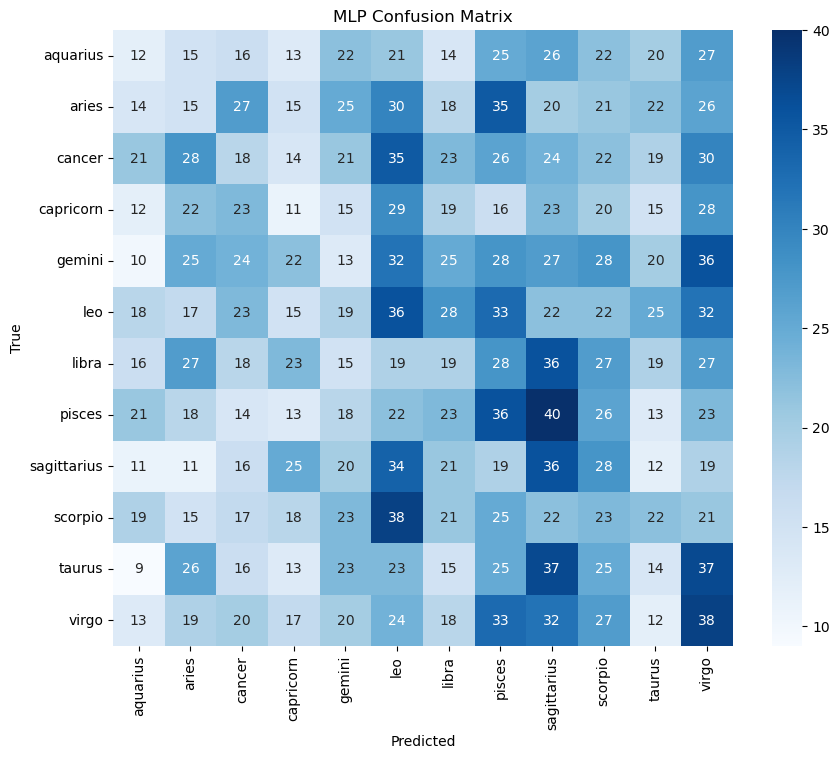

In [75]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Decision Tree

In [76]:
dt=DecisionTreeClassifier()

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
dt.score(X_train,y_train)

0.757609036711641

In [79]:
dt_predict=dt.predict(X_test)

In [80]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

    aquarius       0.09      0.12      0.10       233
       aries       0.04      0.05      0.05       268
      cancer       0.09      0.11      0.10       281
   capricorn       0.11      0.12      0.11       233
      gemini       0.07      0.07      0.07       290
         leo       0.09      0.08      0.09       290
       libra       0.11      0.11      0.11       274
      pisces       0.09      0.07      0.08       267
 sagittarius       0.09      0.08      0.09       252
     scorpio       0.10      0.09      0.09       264
      taurus       0.10      0.08      0.09       263
       virgo       0.08      0.06      0.07       273

    accuracy                           0.09      3188
   macro avg       0.09      0.09      0.09      3188
weighted avg       0.09      0.09      0.09      3188



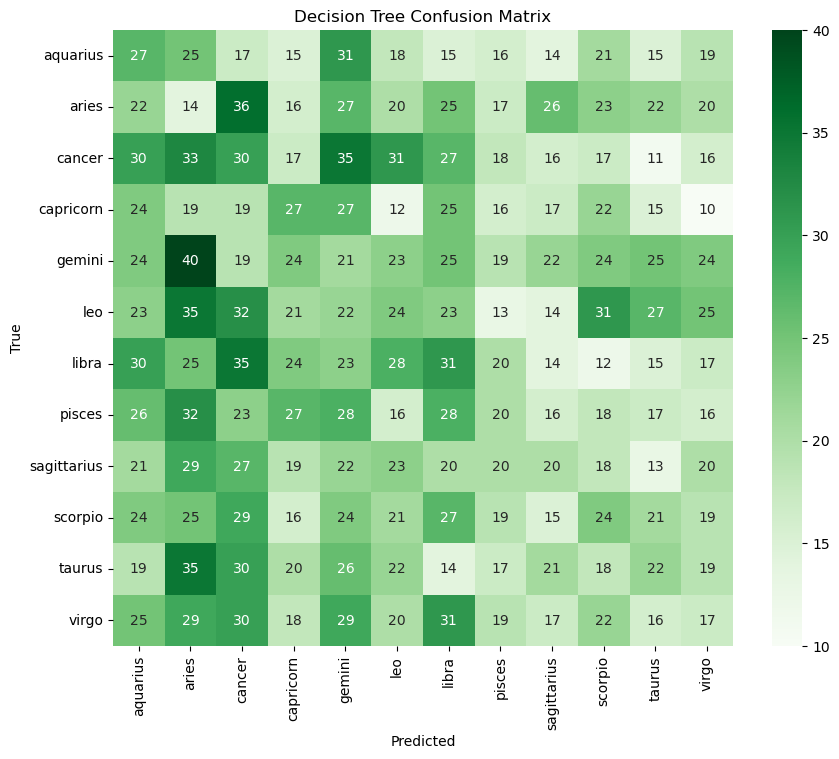

In [81]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Support Vector Classifier

In [82]:
svc=SVC()

In [83]:
svc.fit(X_train,y_train)

SVC()

In [84]:
svc.score(X_train,y_train)

0.19391277063068715

In [85]:
svc_predict=svc.predict(X_test)

In [86]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

    aquarius       0.04      0.01      0.02       233
       aries       0.04      0.03      0.03       268
      cancer       0.08      0.21      0.12       281
   capricorn       0.04      0.01      0.02       233
      gemini       0.07      0.13      0.09       290
         leo       0.10      0.11      0.10       290
       libra       0.08      0.08      0.08       274
      pisces       0.03      0.01      0.02       267
 sagittarius       0.06      0.02      0.03       252
     scorpio       0.10      0.04      0.05       264
      taurus       0.10      0.06      0.07       263
       virgo       0.09      0.19      0.12       273

    accuracy                           0.08      3188
   macro avg       0.07      0.08      0.06      3188
weighted avg       0.07      0.08      0.07      3188



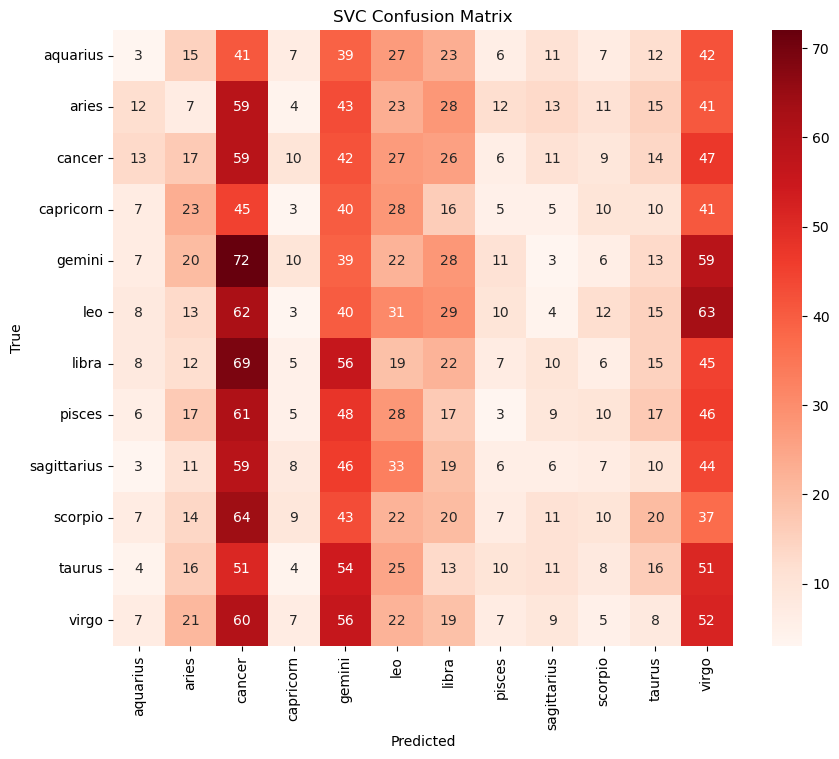

In [87]:
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Random Forest

In [88]:
rf=RandomForestClassifier()

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
rf.score(X_train,y_train)

0.757609036711641

In [91]:
rf_predict=rf.predict(X_test)

In [92]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

    aquarius       0.12      0.12      0.12       233
       aries       0.03      0.03      0.03       268
      cancer       0.08      0.08      0.08       281
   capricorn       0.09      0.10      0.10       233
      gemini       0.08      0.08      0.08       290
         leo       0.08      0.08      0.08       290
       libra       0.08      0.08      0.08       274
      pisces       0.11      0.09      0.10       267
 sagittarius       0.07      0.06      0.07       252
     scorpio       0.10      0.11      0.11       264
      taurus       0.11      0.11      0.11       263
       virgo       0.13      0.14      0.13       273

    accuracy                           0.09      3188
   macro avg       0.09      0.09      0.09      3188
weighted avg       0.09      0.09      0.09      3188



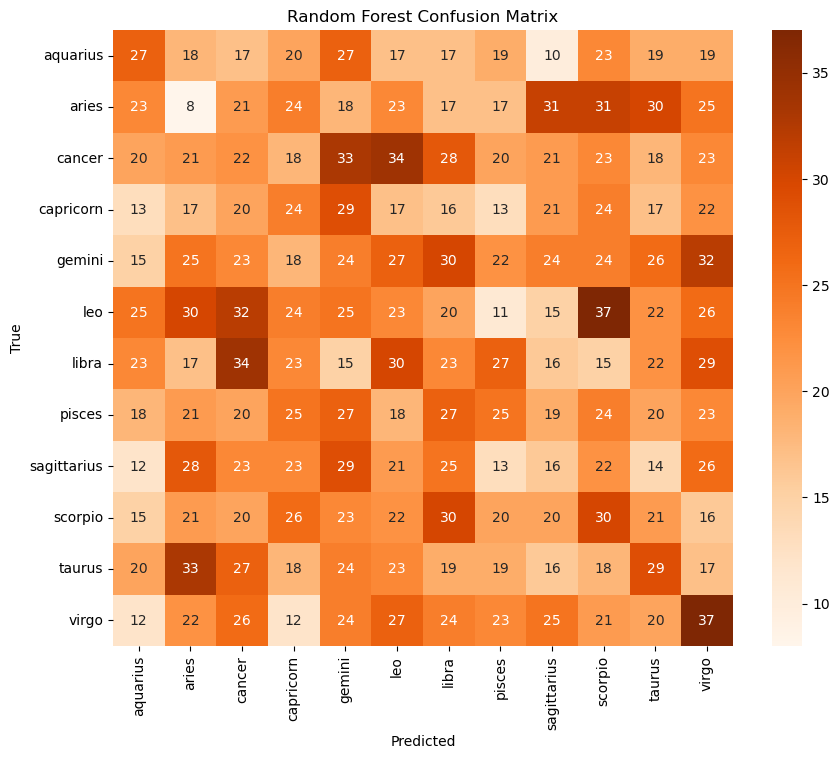

In [93]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Activity 4 - Body Type Prediction

In [94]:
df_copy2=data[['body_type','diet','sex','smokes_codes','drugs_codes','drinks_codes','age']]

In [95]:
df_copy2.head()

,body_type,diet,sex,smokes_codes,drugs_codes,drinks_codes,age
0,a little extra,strictly anything,m,2.0,0.0,2.0,22
1,average,mostly other,m,0.0,1.0,3.0,35
2,thin,anything,m,0.0,NaN,2.0,38
3,thin,vegetarian,m,0.0,NaN,2.0,23
4,athletic,NaN,m,0.0,0.0,2.0,29


In [96]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   body_type     54650 non-null  object 
 1   diet          35551 non-null  object 
 2   sex           59946 non-null  object 
 3   smokes_codes  54434 non-null  float64
 4   drugs_codes   45866 non-null  float64
 5   drinks_codes  56961 non-null  float64
 6   age           59946 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 3.2+ MB


In [97]:
df_copy2 = df_copy2.dropna().copy()

In [98]:
df_copy2.isnull().sum()

body_type       0
diet            0
sex             0
smokes_codes    0
drugs_codes     0
drinks_codes    0
age             0
dtype: int64

In [99]:
df_copy2=pd.get_dummies(data=df_copy2,columns=['diet','sex'],drop_first=True)

In [100]:
y=df_copy2['body_type']

In [101]:
X=df_copy2.drop('body_type',axis=1)

In [102]:
X.head()

,smokes_codes,drugs_codes,drinks_codes,age,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,...,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,sex_m
0,2.0,0.0,2.0,22,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,3.0,35,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0.0,0.0,2.0,31,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0.0,0.0,37,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0.0,0.0,2.0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
scaler=MinMaxScaler()

In [104]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Artificial Neural Network

In [106]:
mlp=MLPClassifier(max_iter=1000)

In [107]:
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=1000)

In [108]:
mlp.score(X_train,y_train)

0.3161549526313179

In [109]:
mlp_predict=mlp.predict(X_test)

In [110]:
print(classification_report(y_test,mlp_predict,zero_division=1))

                precision    recall  f1-score   support

a little extra       0.20      0.00      0.01       288
      athletic       0.33      0.46      0.38      1094
       average       0.29      0.45      0.35      1364
         curvy       0.19      0.17      0.18       350
           fit       0.25      0.24      0.24      1113
  full figured       0.00      0.00      1.00        82
        jacked       1.00      0.00      0.00        46
    overweight       1.00      0.00      0.00        46
rather not say       1.00      0.00      0.00        15
        skinny       0.50      0.01      0.01       163
          thin       0.17      0.01      0.01       444
       used up       0.00      0.00      1.00        36

      accuracy                           0.29      5041
     macro avg       0.41      0.11      0.27      5041
  weighted avg       0.28      0.29      0.27      5041



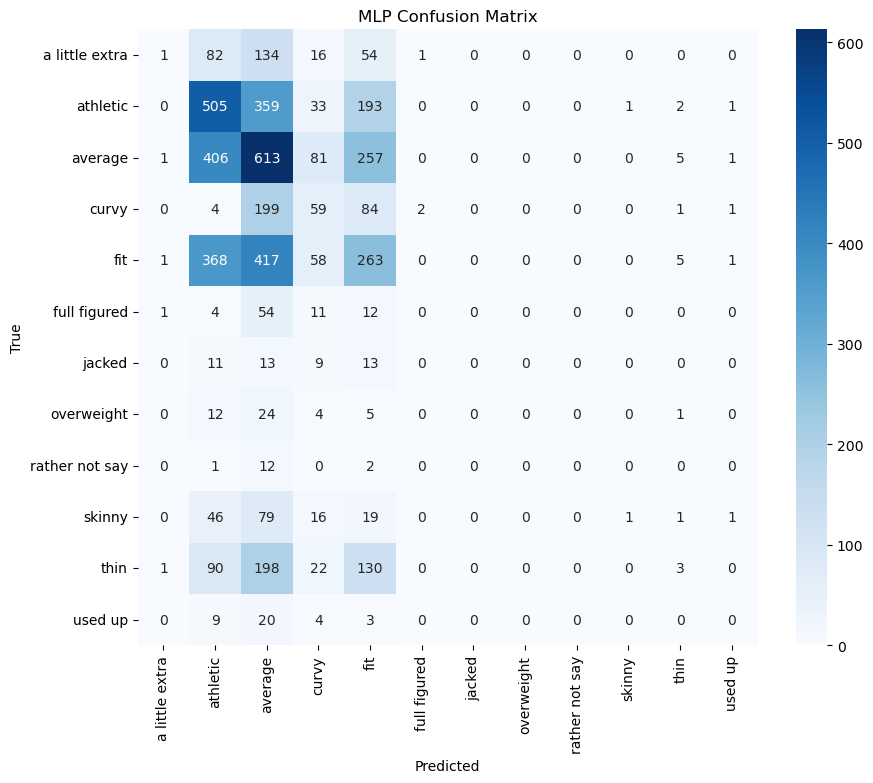

In [111]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Decision Tree

In [112]:
dt=DecisionTreeClassifier()

In [113]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
dt.score(X_train,y_train)

0.49630474678835373

In [115]:
dt_predict=dt.predict(X_test)

In [116]:
print(classification_report(y_test,dt_predict))

                precision    recall  f1-score   support

a little extra       0.06      0.05      0.06       288
      athletic       0.31      0.45      0.36      1094
       average       0.30      0.38      0.33      1364
         curvy       0.18      0.12      0.14       350
           fit       0.25      0.20      0.22      1113
  full figured       0.04      0.01      0.02        82
        jacked       0.25      0.04      0.07        46
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        15
        skinny       0.07      0.02      0.03       163
          thin       0.11      0.04      0.06       444
       used up       0.08      0.03      0.04        36

      accuracy                           0.26      5041
     macro avg       0.14      0.11      0.11      5041
  weighted avg       0.23      0.26      0.24      5041



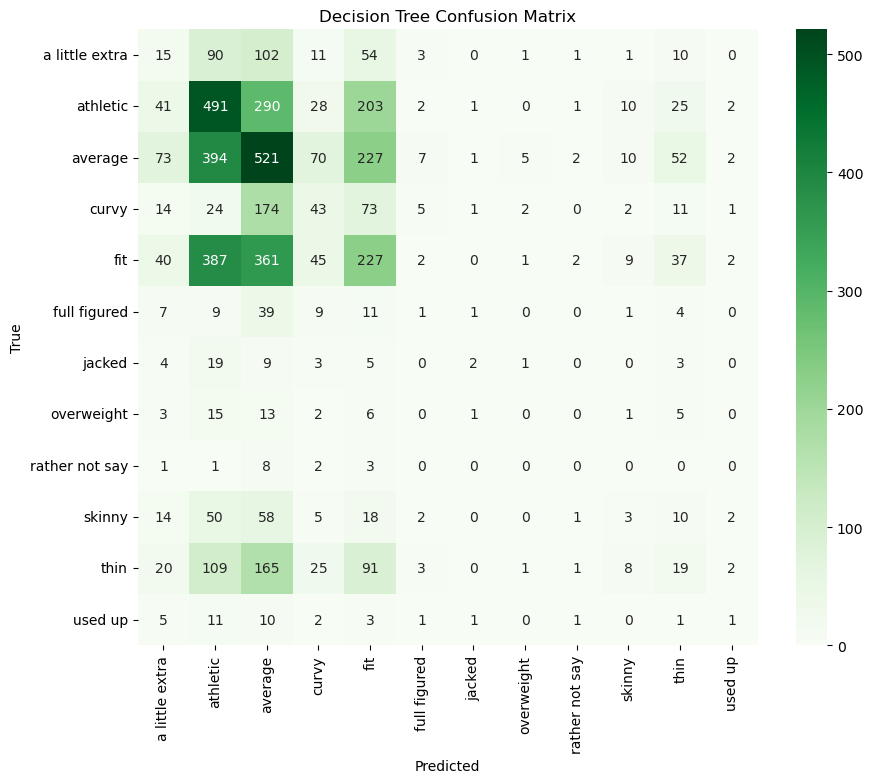

In [117]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Support Vector Classifier

In [118]:
svc=SVC()

In [119]:
svc.fit(X_train,y_train)

SVC()

In [120]:
svc.score(X_train,y_train)

0.30087793264223006

In [121]:
svc_predict=svc.predict(X_test)

In [122]:
print(classification_report(y_test,svc_predict,zero_division=1))

                precision    recall  f1-score   support

a little extra       1.00      0.00      0.00       288
      athletic       0.32      0.58      0.41      1094
       average       0.29      0.52      0.37      1364
         curvy       0.16      0.06      0.08       350
           fit       0.30      0.12      0.18      1113
  full figured       1.00      0.00      0.00        82
        jacked       1.00      0.00      0.00        46
    overweight       1.00      0.00      0.00        46
rather not say       1.00      0.00      0.00        15
        skinny       1.00      0.00      0.00       163
          thin       1.00      0.00      0.00       444
       used up       1.00      0.00      0.00        36

      accuracy                           0.30      5041
     macro avg       0.76      0.11      0.09      5041
  weighted avg       0.45      0.30      0.23      5041



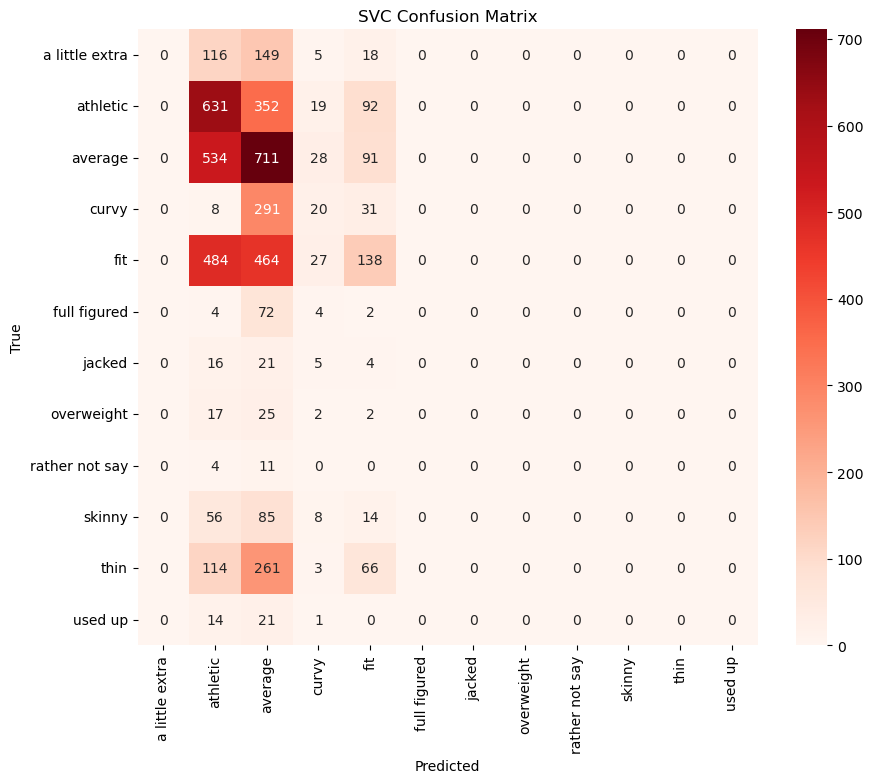

In [123]:
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Random Forest

In [124]:
rf=RandomForestClassifier()

In [125]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
rf.score(X_train,y_train)

0.4962551460741035

In [127]:
rf_predict=rf.predict(X_test)

In [128]:
print(classification_report(y_test,rf_predict))

                precision    recall  f1-score   support

a little extra       0.10      0.04      0.05       288
      athletic       0.31      0.40      0.35      1094
       average       0.29      0.37      0.32      1364
         curvy       0.16      0.14      0.15       350
           fit       0.23      0.24      0.24      1113
  full figured       0.02      0.01      0.02        82
        jacked       0.00      0.00      0.00        46
    overweight       0.12      0.02      0.04        46
rather not say       0.00      0.00      0.00        15
        skinny       0.06      0.02      0.03       163
          thin       0.14      0.07      0.09       444
       used up       0.05      0.03      0.04        36

      accuracy                           0.26      5041
     macro avg       0.12      0.11      0.11      5041
  weighted avg       0.23      0.26      0.24      5041



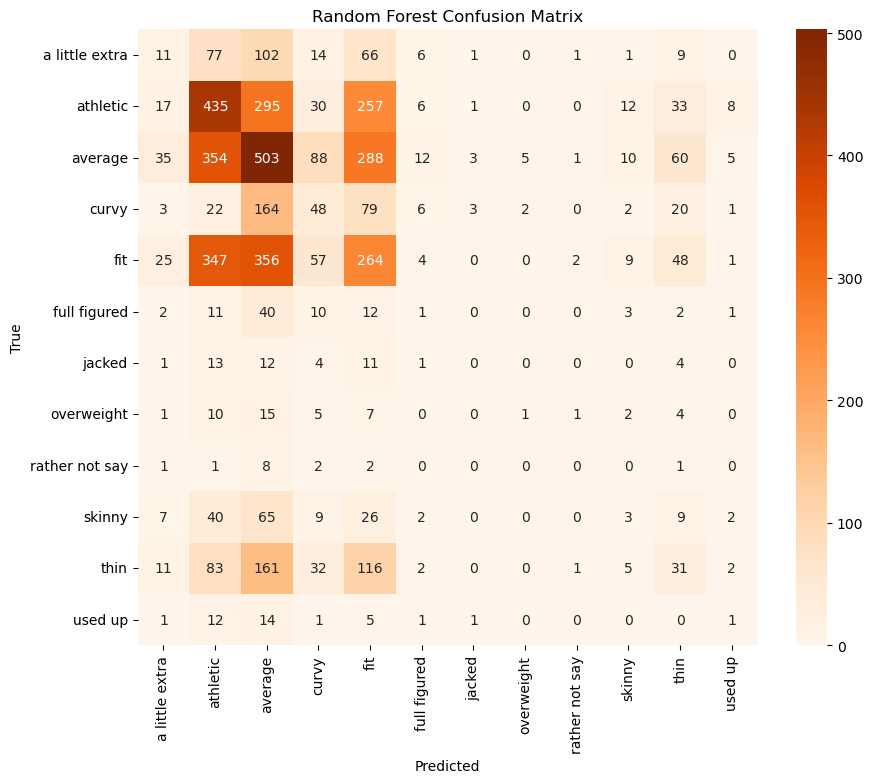

In [129]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Activity 5 - Income Prediction

In [130]:
df_copy3=data[['income','education','job','sex']]

In [131]:
df_copy3.head()

,income,education,job,sex
0,-1,working on college/university,transportation,m
1,80000,working on space camp,hospitality / travel,m
2,-1,graduated from masters program,NaN,m
3,20000,working on college/university,student,m
4,-1,graduated from college/university,artistic / musical / writer,m


In [132]:
df_copy3.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [133]:
df_copy3.loc[df_copy3['income'] == -1, 'income'] = np.NaN


In [134]:
df_copy3.income.value_counts(dropna=False)

NaN          48442
20000.0       2952
100000.0      1621
80000.0       1111
30000.0       1048
40000.0       1005
50000.0        975
60000.0        736
70000.0        707
150000.0       631
1000000.0      521
250000.0       149
500000.0        48
Name: income, dtype: int64

In [135]:
df_copy3 = df_copy3.dropna().copy()


In [136]:
df_copy3.isnull().sum()

income       0
education    0
job          0
sex          0
dtype: int64

In [137]:
df_copy3.head()

,income,education,job,sex
1,80000.0,working on space camp,hospitality / travel,m
3,20000.0,working on college/university,student,m
11,40000.0,graduated from college/university,banking / financial / real estate,m
13,30000.0,graduated from high school,sales / marketing / biz dev,f
14,50000.0,working on college/university,other,f


In [138]:
df_copy3=pd.get_dummies(data=df_copy3,columns=['education','job','sex'],drop_first=True)

In [139]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15936 entries, 0 to 59944
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   body_type_codes                        15936 non-null  float64
 1   drinks_codes                           15936 non-null  float64
 2   drugs_codes                            15936 non-null  float64
 3   smokes_codes                           15936 non-null  float64
 4   sign_cleaned                           15936 non-null  object 
 5   orientation_gay                        15936 non-null  uint8  
 6   orientation_straight                   15936 non-null  uint8  
 7   diet_halal                             15936 non-null  uint8  
 8   diet_kosher                            15936 non-null  uint8  
 9   diet_mostly anything                   15936 non-null  uint8  
 10  diet_mostly halal                      15936 non-null  uint8  
 11  di

In [140]:
y=df_copy3.income

In [141]:
X=df_copy3.drop('income',axis=1)

## Artificial Neural Network

In [142]:
mlp=MLPClassifier(max_iter=1000)
mlp_param_grid={'hidden_layer_sizes':[(7,),(64,)],'alpha':np.logspace(-4,0,5),'random_state':[42]}
mlp_model=GridSearchCV(mlp,mlp_param_grid,cv=5)

In [143]:
mlp_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'hidden_layer_sizes': [(7,), (64,)],
                         'random_state': [42]})

In [144]:
mlp_model.best_score_

0.2946284669335128

In [145]:
mlp_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'random_state': 42}

In [146]:
mlp_predict=mlp_model.predict(X_test)

In [147]:
print(classification_report(y_test,mlp_predict,zero_division=1))

                precision    recall  f1-score   support

a little extra       0.33      0.00      0.01       288
      athletic       0.34      0.45      0.38      1094
       average       0.28      0.59      0.38      1364
         curvy       0.16      0.08      0.11       350
           fit       0.32      0.14      0.19      1113
  full figured       1.00      0.00      0.00        82
        jacked       0.00      0.00      1.00        46
    overweight       1.00      0.00      0.00        46
rather not say       1.00      0.00      0.00        15
        skinny       1.00      0.01      0.02       163
          thin       0.20      0.00      0.00       444
       used up       0.00      0.00      1.00        36

      accuracy                           0.30      5041
     macro avg       0.47      0.11      0.26      5041
  weighted avg       0.33      0.30      0.25      5041



## Decision Tree

In [148]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
dt=DecisionTreeClassifier()
dt_param_grid={'criterion':['gini','entropy'],'max_depth':[8,12,18,24,None],'min_samples_leaf':range(1, 9)}
dt_model=GridSearchCV(dt,dt_param_grid,cv=5)

In [150]:
dt_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 18, 24, None],
                         'min_samples_leaf': range(1, 9)})

In [151]:
dt_model.best_score_

0.35358374605320125

In [152]:
dt_model.best_params_

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 8}

In [153]:
dt_predict=dt_model.predict(X_test)

In [154]:
print(classification_report(y_test,dt_predict,zero_division=1))

              precision    recall  f1-score   support

     20000.0       0.45      0.90      0.60       556
     30000.0       0.09      0.01      0.02       208
     40000.0       0.17      0.05      0.07       175
     50000.0       0.12      0.12      0.12       152
     60000.0       1.00      0.00      0.00       156
     70000.0       1.00      0.00      0.00       140
     80000.0       0.15      0.07      0.10       181
    100000.0       0.28      0.60      0.39       283
    150000.0       0.26      0.15      0.19       130
    250000.0       1.00      0.00      0.00        30
    500000.0       1.00      0.00      0.00         7
   1000000.0       0.25      0.03      0.06        90

    accuracy                           0.35      2108
   macro avg       0.48      0.16      0.13      2108
weighted avg       0.39      0.35      0.25      2108



## Support Vector Classifier

In [155]:
svc=SVC()
svc_param_grid={'kernel':['rbf','linear','poly'],'random_state':[42]}
svc_model=GridSearchCV(svc,svc_param_grid,cv=5)

In [156]:
svc_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['rbf', 'linear', 'poly'],
                         'random_state': [42]})

In [157]:
svc_model.best_score_

0.3630771830153014

In [158]:
svc_model.best_params_

{'kernel': 'linear', 'random_state': 42}

In [159]:
svc_predict=svc_model.predict(X_test)

In [160]:
print(classification_report(y_test,svc_predict,zero_division=1))

              precision    recall  f1-score   support

     20000.0       0.49      0.88      0.63       556
     30000.0       0.10      0.01      0.02       208
     40000.0       0.19      0.07      0.10       175
     50000.0       0.12      0.12      0.12       152
     60000.0       0.00      0.00      1.00       156
     70000.0       0.20      0.02      0.04       140
     80000.0       0.11      0.04      0.06       181
    100000.0       0.29      0.77      0.42       283
    150000.0       0.00      0.00      1.00       130
    250000.0       1.00      0.00      0.00        30
    500000.0       1.00      0.00      0.00         7
   1000000.0       0.17      0.03      0.06        90

    accuracy                           0.36      2108
   macro avg       0.31      0.16      0.29      2108
weighted avg       0.25      0.36      0.39      2108



##  Random Forest

In [161]:
rf=RandomForestClassifier()
rf_param_grid={'criterion':['gini','entropy'],'max_depth':[8,12,18,24,None],'min_samples_leaf':range(1,9),'n_estimators':[50,100,200]}
rf_model=GridSearchCV(rf,rf_param_grid,cv=5)

In [162]:
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 18, 24, None],
                         'min_samples_leaf': range(1, 9),
                         'n_estimators': [50, 100, 200]})

In [163]:
rf_model.best_score_

0.3633137973395849

In [164]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 6,
 'n_estimators': 200}

In [165]:
rf_predict=rf_model.predict(X_test)

In [166]:
print(classification_report(y_test,rf_predict,zero_division=1))

              precision    recall  f1-score   support

     20000.0       0.41      0.95      0.58       556
     30000.0       1.00      0.00      0.00       208
     40000.0       0.10      0.01      0.01       175
     50000.0       0.15      0.04      0.06       152
     60000.0       1.00      0.00      0.00       156
     70000.0       1.00      0.00      0.00       140
     80000.0       0.00      0.00      1.00       181
    100000.0       0.28      0.77      0.41       283
    150000.0       0.00      0.00      1.00       130
    250000.0       1.00      0.00      0.00        30
    500000.0       1.00      0.00      0.00         7
   1000000.0       1.00      0.00      0.00        90

    accuracy                           0.36      2108
   macro avg       0.58      0.15      0.25      2108
weighted avg       0.47      0.36      0.36      2108



## Activity 6 - Sex Prediction based on Education Level and Income

In [167]:
df_copy4=data[['sex','education','income']]

In [168]:
df_copy4.head()

,sex,education,income
0,m,working on college/university,-1
1,m,working on space camp,80000
2,m,graduated from masters program,-1
3,m,working on college/university,20000
4,m,graduated from college/university,-1


In [169]:
df_copy4.loc[df_copy4['income'] == -1, 'income'] = np.NaN


In [170]:
df_copy4 = df_copy4.dropna().copy()

In [171]:
df_copy4.isnull().sum()

sex          0
education    0
income       0
dtype: int64

In [172]:
df_copy4.head()

,sex,education,income
1,m,working on space camp,80000.0
3,m,working on college/university,20000.0
11,m,graduated from college/university,40000.0
13,f,graduated from high school,30000.0
14,f,working on college/university,50000.0


In [173]:
df_copy4=pd.get_dummies(data=df_copy4,columns=['education'],drop_first=True)

In [174]:
df_copy4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10783 entries, 1 to 59943
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   sex                                          10783 non-null  object 
 1   income                                       10783 non-null  float64
 2   education_dropped out of college/university  10783 non-null  uint8  
 3   education_dropped out of high school         10783 non-null  uint8  
 4   education_dropped out of law school          10783 non-null  uint8  
 5   education_dropped out of masters program     10783 non-null  uint8  
 6   education_dropped out of med school          10783 non-null  uint8  
 7   education_dropped out of ph.d program        10783 non-null  uint8  
 8   education_dropped out of space camp          10783 non-null  uint8  
 9   education_dropped out of two-year college    10783 non-null  uint8  
 10

In [175]:
y=df_copy4['sex']

In [176]:
X=df_copy4.drop('sex',axis=1)

In [177]:
X.head()

,income,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,education_graduated from college/university,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,80000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,40000.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,30000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [178]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Artificial Neural Network

In [180]:
mlp=MLPClassifier(max_iter=1000)
mlp_model=mlp.fit(X_train,y_train)

In [181]:
mlp_model.score(X_train,y_train)

0.728727104103872

In [182]:
mlp_predict=mlp_model.predict(X_test)

In [183]:
print(classification_report(y_test,mlp_predict))

              precision    recall  f1-score   support

           f       0.47      0.07      0.13       588
           m       0.74      0.97      0.84      1569

    accuracy                           0.72      2157
   macro avg       0.60      0.52      0.48      2157
weighted avg       0.66      0.72      0.64      2157



## Decision Tree

In [184]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(X_train,y_train)

In [185]:
dt_model.score(X_train,y_train)

0.7332483190354742

In [186]:
dt_predict=dt_model.predict(X_test)

In [187]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           f       0.36      0.05      0.09       588
           m       0.73      0.96      0.83      1569

    accuracy                           0.72      2157
   macro avg       0.54      0.51      0.46      2157
weighted avg       0.63      0.72      0.63      2157



## Support Vector Classifier

In [188]:
svc=SVC()
svc_model=svc.fit(X_train,y_train)

In [189]:
svc_model.score(X_train,y_train)

0.7245536749362392

In [190]:
svc_predict=svc_model.predict(X_test)

In [191]:
print(classification_report(y_test,svc_predict,zero_division=1))

              precision    recall  f1-score   support

           f       1.00      0.00      0.00       588
           m       0.73      1.00      0.84      1569

    accuracy                           0.73      2157
   macro avg       0.86      0.50      0.42      2157
weighted avg       0.80      0.73      0.61      2157



## Random Forest

In [192]:
rf=RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)

In [193]:
rf_model.score(X_train,y_train)

0.7332483190354742

In [194]:
rf_predict=rf_model.predict(X_test)

In [195]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           f       0.38      0.05      0.09       588
           m       0.73      0.97      0.83      1569

    accuracy                           0.72      2157
   macro avg       0.55      0.51      0.46      2157
weighted avg       0.64      0.72      0.63      2157



## Activity 7 - Model Comparison and Evaluation

Task 1: Compare the performance of different models.

You trained and evaluated four different machine learning models for predicting income, sex, body type, and zodiac signs:

For Zodiac Sign Prediction:
1. Artificial Neural Network (MLPClassifier):
   - Training Accuracy: 26.76%
   - Test Accuracy: 8.93%

2. Decision Tree:
   - Training Accuracy: 75.76%
   - Test Accuracy: 8.93%

3. Support Vector Classifier (SVC):
   - Training Accuracy: 19.39%
   - Test Accuracy: 8.02%

4. Random Forest:
   - Training Accuracy: 75.76%
   - Test Accuracy: 8.93%

For Body Type Prediction:
1. Artificial Neural Network (MLPClassifier):
   - Accuracy: 29%
   - Precision: 0.25, Recall: 0.29, F1-score: 0.37

2. Decision Tree:
   - Accuracy: 26%
   - Precision: 0.23, Recall: 0.26, F1-score: 0.24

3. Support Vector Classifier (SVC):
   - Accuracy: 30%
   - Precision: 0.45, Recall: 0.30, F1-score: 0.23

4. Random Forest:
   - Accuracy: 26%
   - Precision: 0.23, Recall: 0.26, F1-score: 0.24

For Income Prediction:
1. Artificial Neural Network (MLPClassifier):**
   - Best Accuracy: 29.46%
   - Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'random_state': 42}
   
2. Decision Tree:
   - Best Accuracy: 35.36%
   - Hyperparameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 8}
   
3. Support Vector Classifier (SVC):
   - Best Accuracy: 36.31%
   - Hyperparameters: {'kernel': 'linear', 'random_state': 42}
   
4. Random Forest:
   - Best Accuracy: 36.30%
   - Hyperparameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 7, 'n_estimators': 100}

For Sex Prediction:
1. Artificial Neural Network (MLPClassifier):
   - Accuracy: 72.93%
   
2. Decision Tree:
   - Accuracy: 72.33%
   
3. Support Vector Classifier (SVC):
   - Accuracy: 72.45%
   
4. Random Forest:
   - Accuracy: 72.33%



Task 2: Evaluate accuracy, precision, recall, and F1-score of each model.

For Zodiac Sign Prediction:
- All models exhibited low accuracy, precision, recall, and F1-scores for each sign, suggesting challenges in capturing underlying patterns.

For Body Type Prediction:
- Decision Tree and Random Forest exhibited slightly better overall performance compared to MLP and SVC.
- Precision, recall, and F1-scores fluctuated, emphasizing the need for further model refinement.

For Income Prediction:
- Decision Tree and Random Forest outperformed the Artificial Neural Network and Support Vector Classifier.
- Precision, recall, and F1-score varied across income categories, indicating challenges in predicting specific income levels.

For Sex Prediction:
- All models achieved similar accuracies around 72%, with little variation.
- Precision, recall, and F1-score were reasonably balanced between the classes.


Task 3: Identify strengths and weaknesses of each model.

Strengths:
- Decision Tree and Random Forest showed competitive performance for income, sex, and body type prediction.
- Neural networks (MLP) captured complex patterns for sex and body type prediction.

Weaknesses:
- Predicting income levels proved challenging, possibly due to the complexity of the underlying patterns.
- Support Vector Classifier struggled with precision in sex prediction, body type prediction, and zodiac sign prediction.

Task 4: Summarize model comparison results.

- Decision Tree and Random Forest are recommended for income, sex, and body type prediction, considering their balanced performance.
- Neural networks performed well in sex and body type prediction but struggled with income prediction.
- Support Vector Classifier had lower precision in sex prediction, body type prediction, and zodiac sign prediction.



Task 5: Provide recommendations based on model performance.

1.For Zodiac Sign Prediction:
   - The overall performance of all models for zodiac sign prediction is low.
   - Further analysis, feature engineering, or hyperparameter tuning may be required to improve model performance.
   
2.For Body Type Prediction:
   - Decision Tree and Random Forest exhibited better performance, but further refinement is needed.
   - Explore additional features or conduct hyperparameter tuning to improve model accuracy.

3..For Income Prediction:
   - Consider Decision Tree or Random Forest for better performance.
   - Further feature engineering or exploration may improve model performance.

4.For Sex Prediction:
   - Any of the models could be suitable, but Decision Tree and Random Forest are slightly favored.
   - Evaluate if additional features could enhance prediction accuracy.
   
5.General Recommendations:
   - Continue refining models and exploring new features to improve predictions.
   - Regularly monitor and update models as new data becomes available.